In [ ]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>

### Matplotlib 3.4.2 (ver 3.5.1はバグある)
### pysimplugui 4.28.0

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat

*** Duplicate key found in your layout Tab1 ***
*** Replaced new key with Tab10 ***
*** Duplicate key found in your layout Tab2 ***
*** Replaced new key with Tab21 ***
*** Duplicate key found in your layout Tab3 ***
*** Replaced new key with Tab32 ***
Transparent color not supported on this platform (windows only)
Warning, error setting width on element with key= browser_key


/Users/koyamanaoki/opt/anaconda3/envs/finesse/lib/python3.8/site-packages/pykat/finesse.py:1905: UserWarning: 'amptd_an_misal_REFL_0_0_45015900.0_y-split' does not have attribute called 'pdtype'
  self.__detectors[component_name].pdtype = v[2]
/Users/koyamanaoki/opt/anaconda3/envs/finesse/lib/python3.8/site-packages/pykat/finesse.py:1905: UserWarning: 'amptd_an_misal_REFL_0_0_16881000.0_y-split' does not have attribute called 'pdtype'
  self.__detectors[component_name].pdtype = v[2]
/Users/koyamanaoki/opt/anaconda3/envs/finesse/lib/python3.8/site-packages/pykat/finesse.py:1905: UserWarning: 'amptd_an_misal_AS_0_0_16881000.0_y-split' does not have attribute called 'pdtype'
  self.__detectors[component_name].pdtype = v[2]
/Users/koyamanaoki/opt/anaconda3/envs/finesse/lib/python3.8/site-packages/pykat/finesse.py:1905: UserWarning: 'amptd_an_misal_REFL_0_0_45015900.0_y-split' does not have attribute called 'pdtype'
  self.__detectors[component_name].pdtype = v[2]
/Users/koyamanaoki/opt/ana

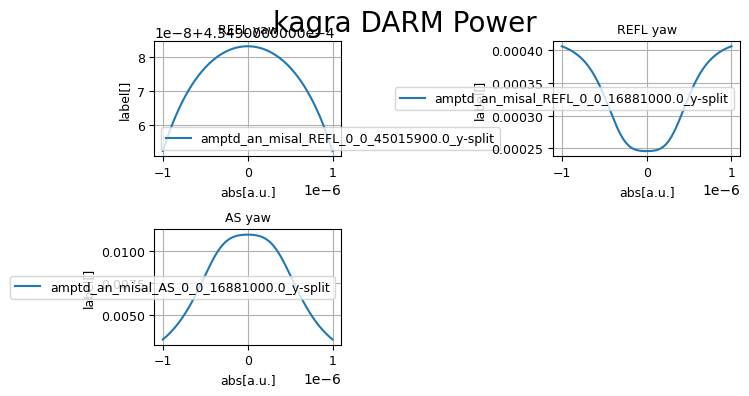

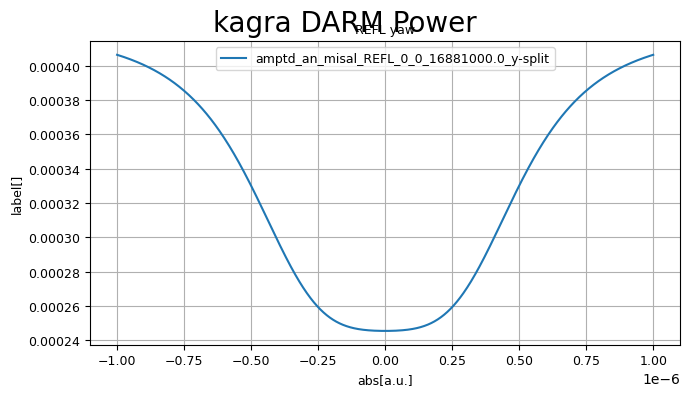

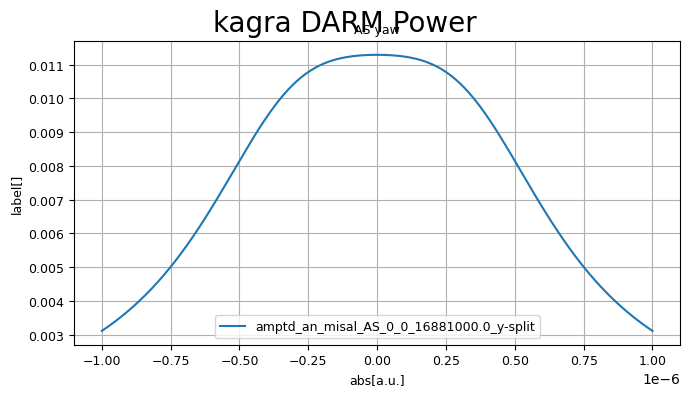

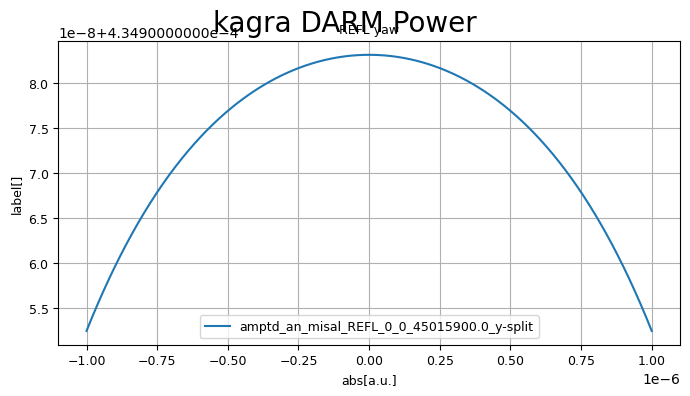

100% | ETA:  0:00:00 | Calculating                                             

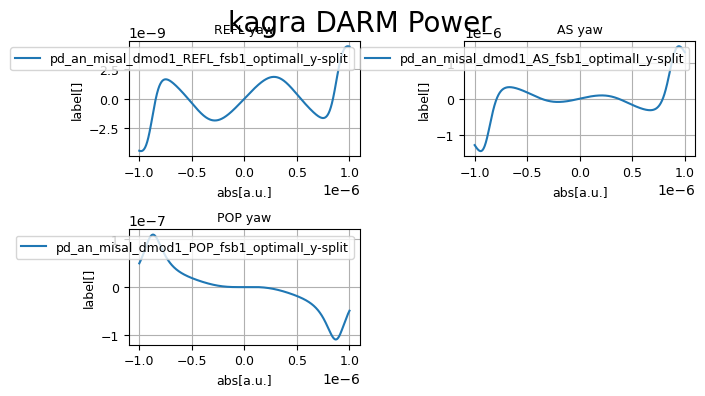

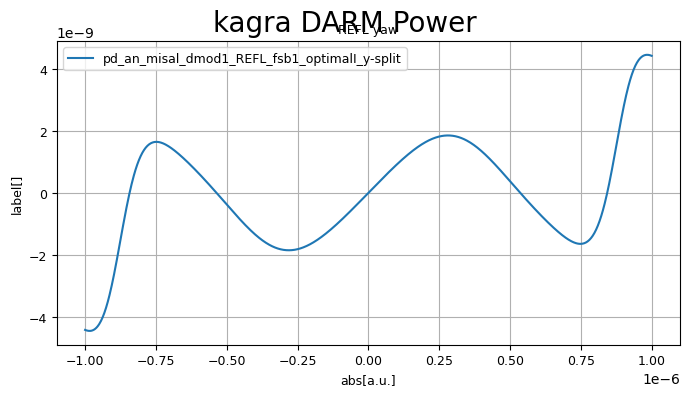

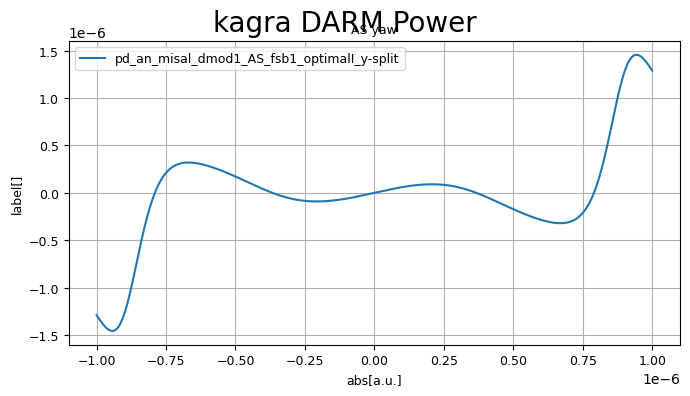

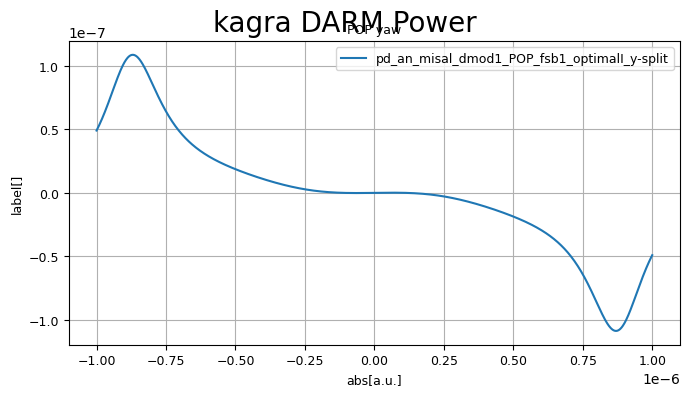

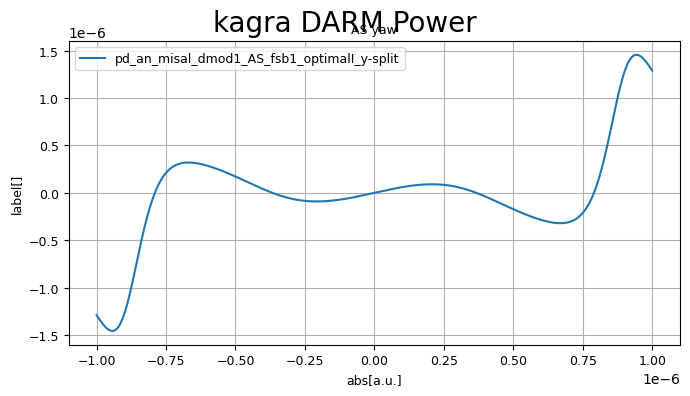

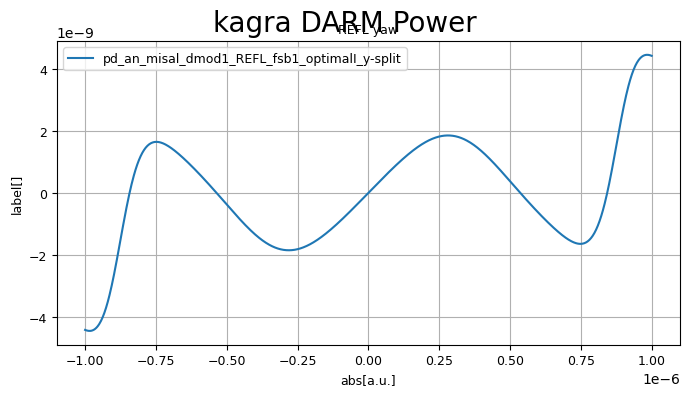

100% | ETA:  0:00:00 | Calculating                                             

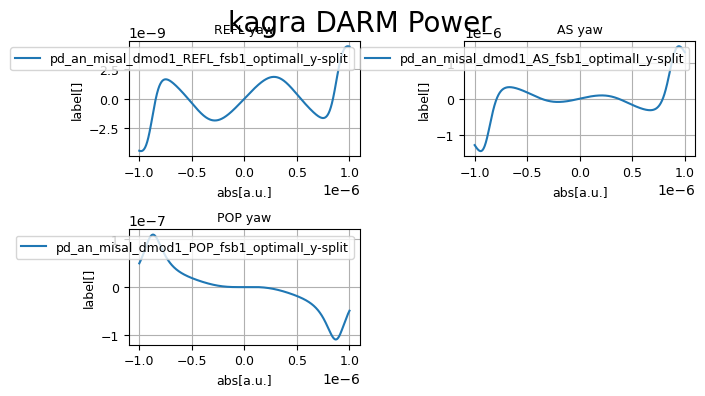

2022-08-22 17:46:14.341 python[13082:5584417] _TIPropertyValueIsValid called with 4 on nil context!
2022-08-22 17:46:14.342 python[13082:5584417] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2022-08-22 17:46:14.342 python[13082:5584417] Text input context does not respond to _valueForTIProperty:
2022-08-22 17:46:14.343 python[13082:5584417] _TIPropertyValueIsValid called with 4 on nil context!
2022-08-22 17:46:14.343 python[13082:5584417] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2022-08-22 17:46:14.343 python[13082:5584417] Text input context does not respond to _valueForTIProperty:
2022-08-22 17:47:30.772 python[13082:5584417] _TIPropertyValueIsValid called with 4 on nil context!
2022-08-22 17:47:30.772 python[13082:5584417] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2022-08-22 17:47:30.772 python[13082:5584417] Text input context does not respond to _valueF

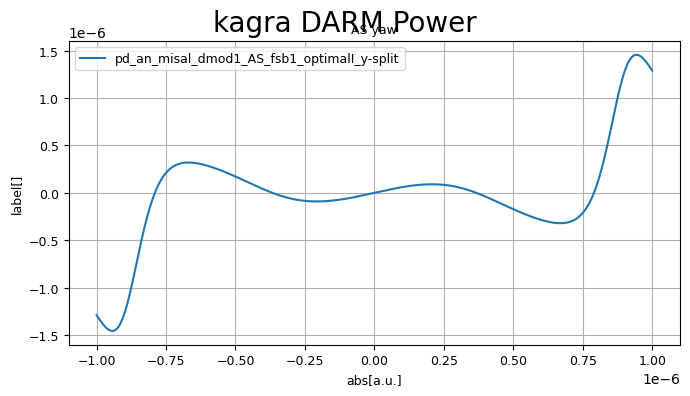

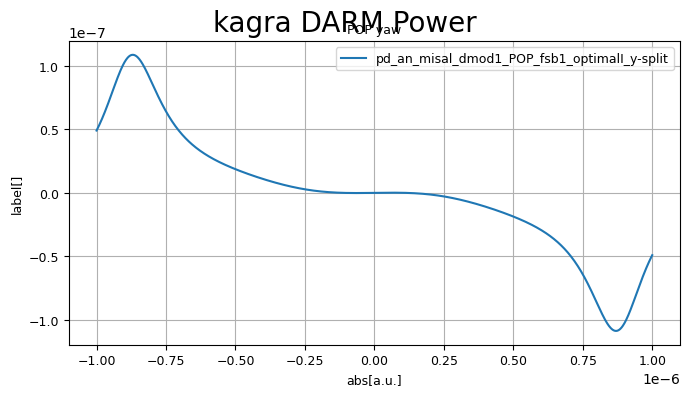

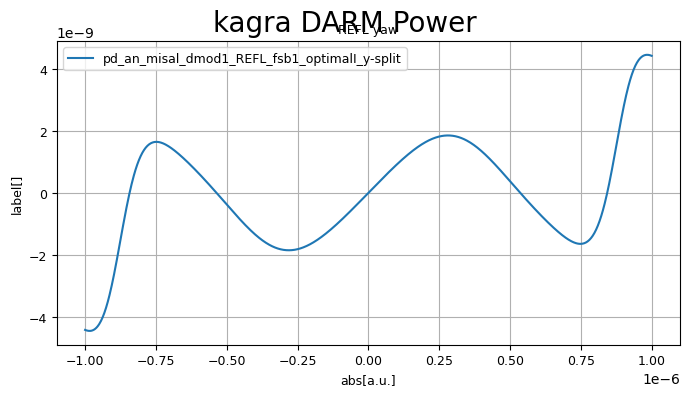

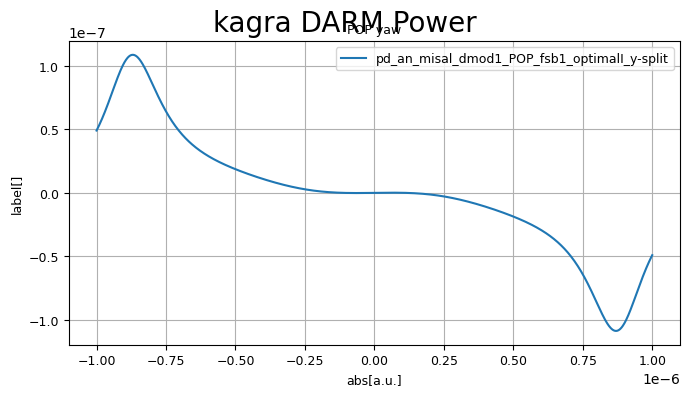

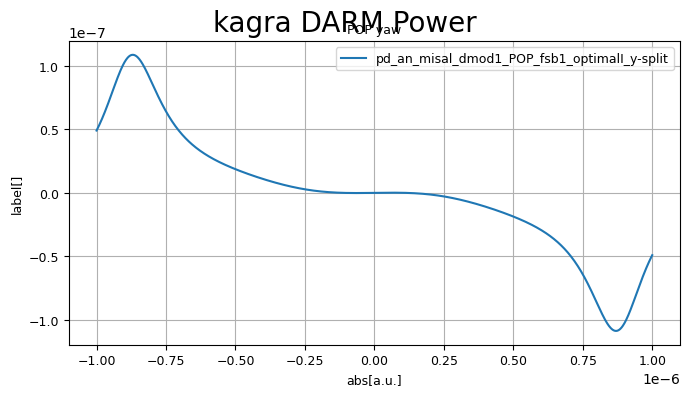

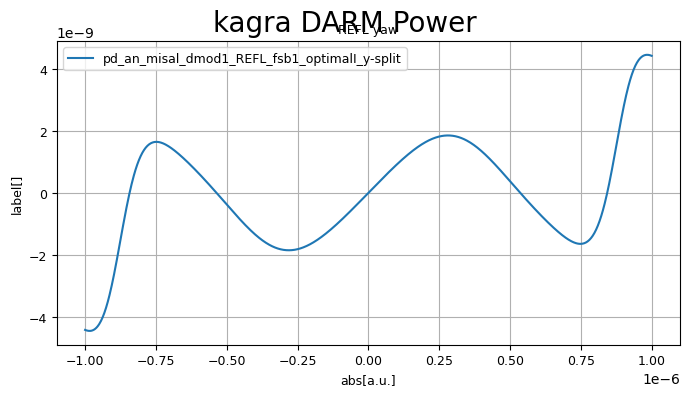

100% | ETA:  0:00:00 | Calculating                                             2022-08-22 17:57:07.459 python[13082:5584417] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


BasePyKatException: Mirror PRM has R+T = 1.099955, must be <= 1

In [1]:
import PySimpleGUI as sg
import datetime
import util_func
from pykat import finesse
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.figure as plt
import matplotlib.cm as cm
import numpy as np
import sys
import math
import copy
import util_func_pysimplegui
import plot_finesse
import pysimplegui_layout
import output_finesse
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import My_simplified_optics

# 既知のバグですが、たまにGUIの表示がいろいろ重なって表示されます。
# なんでもいいのでボタンを押して画面を更新すると治るみたいです。
window = pysimplegui_layout.make_window()

##############################################################
initialization = False# GUIを立ち上げた一番最初だけ実行するための変数
type_of_pd_signal = 'sw_power'# Pdの信号の検出の方法 sw_power/sw_amptd/sw_dmod1/tf_power/tf_amptd/tf_dmod2
#window['kselected_tab'].expand(expand_x=True)# tabの中にあるオブジェクトのサイズに応じてtabのサイズを横幅いっぱいになるように変更する
#window['layoutkey'].expand(expand_x=True)# 枠で囲ったGUIのサイズに応じて枠のサイズを幅いっぱいになるように変更する
#window["colkey"].expand(expand_x=True)
#window["finesse_input_layout_key"].expand(expand_x=True)
#window["all_layout_key"].expand(expand_x=True)
#window['sw_dmod1_box'].expand(expand_y=False)
#window['all_layout_key'].expand(expand_x=True)
#shrink=True

# global variable
sw_dmod1_plotnum = 1
sw_dmod1_plotnum_max = 20
tf_dmod2_plotnum = 1
tf_dmod2_plotnum_max = 20
an_misal_plotnum = 1
an_misal_plotnum_max = 20
an_misal_mirtnum = 1
an_misal_mirtnum_max = 20
swan_gouyp_plotnum = 1
swan_gouyp_plotnum_max = 20
swan_gouyp_mirtnum = 1
swan_gouyp_mirtnum_max = 20
#kifo_an_misal_plotminus
interferometer   = "DRFPMI"
base_name = "kagra"
path = util_func.get_layout_drawing_path(base_name,interferometer,"normalsize")
drawingsize = "normalsize"
param_sec = util_func_pysimplegui.get_all_param_sec()
gui_window_flag=True
tmp_save_script_dict={
    "initial" : "initial_text"
}
sim_conf={}
sim_conf["k_inf_c_xaxis_log"]=False
sim_conf["k_inf_c_yaxis_log"]=False

fig = matplotlib.figure.Figure(figsize=(4.75, 4), dpi=100)
t = np.arange(0, 3, .01)
ax = fig.add_subplot(1,1,1)
ax.plot(t, 2 * np.sin(2 * np.pi * t))
#fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))

fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig)


def get_variable_names(window):
    key_list = list(window.AllKeysDict)
    return key_list

def component_filter(filter,not_flag,list_data):
    if not_flag:
        l_in_not = [s for s in list_data if filter not in s]
        return l_in_not
    else:
        l_in = [s for s in list_data if filter in s]
        return l_in
def Debug_Components(window):
    test_keys = get_variable_names(window)
    max_table_num = len(test_keys)
    data2 = []
    for i in range(max_table_num):
        data2_1=[]
        data2_1.append(test_keys[i])
        data2_1.append(type(window[test_keys[i]]).__name__)
        data2.append(data2_1)
    window["Components_table"].update(data2)
def get_variable_names(window):
    key_list = list(window.AllKeysDict)
    return key_list

def component_filter(filter,not_flag,list_data):
    if not_flag:
        l_in_not = [s for s in list_data if filter not in s]
        return l_in_not
    else:
        l_in = [s for s in list_data if filter in s]
        return l_in
def Debug_Components(window):
    test_keys = get_variable_names(window)
    max_table_num = len(test_keys)
    data2 = []
    for i in range(max_table_num):
        data2_1=[]
        data2_1.append(test_keys[i])
        data2_1.append(type(window[test_keys[i]]).__name__)
        data2.append(data2_1)
    window["Components_table"].update(data2)

"""
def get_figure_title(type_of_pd_signal):
    if type_of_pd_signal=="sw_power":
        figure_title = "length DC sweep"
    elif type_of_pd_signal=="sw_amptd":
        figure_title = "length DC sweep"
    elif type_of_pd_signal=="sw_dmod1":
        figure_title = "length DC sweep"
    elif type_of_pd_signal=="sw_dmodp":
        figure_title = "demodulation phase sweep"
    elif type_of_pd_signal=="tf_dmod2":
        figure_title = "length sweep"

    elif type_of_pd_signal=="sw_power":
        figure_title = "length DC sweep"
    elif type_of_pd_signal=="sw_power":
        figure_title = "length DC sweep"
    return figure_title
"""

def get_plot_labels(type_of_pd_signal,x_labels,y_labels):
    if type_of_pd_signal=="sw_power":
        y_labels.append("Watt")
    elif type_of_pd_signal=="sw_amptd":
        y_labels.append("sqrt(Watt)")
    elif type_of_pd_signal=="sw_dmod1":
        y_labels.append("Watt")
    elif type_of_pd_signal=="sw_dmodp":
        y_labels.append("A.U.")
    elif type_of_pd_signal=="tf_dmod2":
        y_labels.append("A.U.")

    elif type_of_pd_signal=="sw_power":
        pass
    elif type_of_pd_signal=="sw_power":
        pass

    return x_labels,y_labels



def initialize():
    # classification
    util_func_pysimplegui.classification_selector("length", 0,0, window)
    type_of_pd_signal = 'sw_power'

    window["kifo_sec_sw_setting"].update(True)
    window["kifo_sec_tf_setting"].update(False)
    window["kifo_sec_st_setting"].update(False)
    window["kifo_sec_sw_power_setting"].update(True)
    window["kifo_sec_sw_amptd_setting"].update(False)
    window["kifo_sec_sw_dmod1_setting"].update(False)
    window["kifo_sec_tf_power_setting"].update(False)
    window["kifo_sec_st_type1_setting"].update(False)
    window["kifo_sec_st_type2_setting"].update(False)
    window["kifo_sec_st_type3_setting"].update(False)
    #window["kifo_sec_an_misal_setting"].update(False)
    window["dof_selection_menu"].update(True)
    window["sweep_phase_mirror_menu"].update(False)
    window["kifo_misal_mirror_selection"].update(visible=False)
    window["misalign_mirror_selection_menu"].update(False)
    window["tfan_dof_selection_menu"].update(False)
    util_func_pysimplegui.all_sw_dmod1_box_close(sw_dmod1_plotnum_max, window)
    util_func_pysimplegui.all_tf_dmod2_box_close(tf_dmod2_plotnum_max, window)
    util_func_pysimplegui.all_an_misal_box_close(an_misal_plotnum_max, window)
    util_func_pysimplegui.all_an_misal_mirt_box_close(an_misal_mirtnum_max, window)
    util_func_pysimplegui.all_swan_gouyp_box_close(swan_gouyp_plotnum_max, window)
    util_func_pysimplegui.all_swan_gouyp_mirt_box_close(swan_gouyp_mirtnum_max, window)
    #all_an_misal_box_close(an_misal_plotnum_max)
    for name in util_func_pysimplegui.get_all_param_sec().keys():
        window["%s_param_sec"%name].update(False)
    util_func_pysimplegui.mirror_sec_condition(False, window, "all", True)

    ######################################################
    window["k_inf_c_mibs_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_mibs_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_mibs_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_mibs_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_itmx_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_itmx_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_itmx_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_itmx_mirror_tf_zf_box_10"].update(False)

    ######################################################
    window["k_inf_c_itmy_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_itmy_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_itmy_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_itmy_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_etmx_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_etmx_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_etmx_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_etmx_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_etmy_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_etmy_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_etmy_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_etmy_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_prm_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_prm_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_prm_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_prm_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_pr2_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_pr2_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_pr2_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_pr2_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_pr3_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_pr3_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_pr3_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_pr3_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_srm_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_srm_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_srm_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_srm_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_sr2_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_sr2_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_sr2_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_sr2_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_sr3_mirror_tf_pf_box_1"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_2"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_3"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_4"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_5"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_6"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_7"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_8"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_9"].update(False)
    window["k_inf_c_sr3_mirror_tf_pf_box_10"].update(False)

    window["k_inf_c_sr3_mirror_tf_zf_box_1"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_2"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_3"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_4"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_5"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_6"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_7"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_8"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_9"].update(False)
    window["k_inf_c_sr3_mirror_tf_zf_box_10"].update(False)


    ######################################################
    window["k_inf_c_mibs_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_itmx_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_itmy_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_etmx_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_etmy_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_prm_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_pr2_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_pr3_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_srm_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_sr2_mirror_tf_pf_box_1"].update(True)
    window["k_inf_c_sr3_mirror_tf_pf_box_1"].update(True)

    window["k_inf_c_mibs_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_itmx_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_itmy_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_etmx_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_etmy_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_prm_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_pr2_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_pr3_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_srm_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_sr2_mirror_tf_zf_box_1"].update(True)
    window["k_inf_c_sr3_mirror_tf_zf_box_1"].update(True)



    # resonance
    ######################################################
    window["k_inf_c_mibs_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_mibs_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_itmx_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_itmx_mirror_tf_re_box_10"].update(False)

    ######################################################
    window["k_inf_c_itmy_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_itmy_mirror_tf_re_box_10"].update(False)

    ######################################################
    window["k_inf_c_etmx_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_etmx_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_etmy_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_etmy_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_prm_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_prm_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_pr2_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_pr2_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_pr3_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_pr3_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_srm_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_srm_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_sr2_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_sr2_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_sr3_mirror_tf_re_box_1"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_2"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_3"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_4"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_5"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_6"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_7"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_8"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_9"].update(False)
    window["k_inf_c_sr3_mirror_tf_re_box_10"].update(False)


    ######################################################
    window["k_inf_c_mibs_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_itmx_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_itmy_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_etmx_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_etmy_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_prm_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_pr2_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_pr3_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_srm_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_sr2_mirror_tf_re_box_1"].update(True)
    window["k_inf_c_sr3_mirror_tf_re_box_1"].update(True)



    # PZK and Quality Factor
    ######################################################
    window["k_inf_c_mibs_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_mibs_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_itmx_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_itmx_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_itmy_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_itmy_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_etmx_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_etmx_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_etmy_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_etmy_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_prm_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_prm_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_pr2_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_pr2_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_pr3_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_pr3_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_srm_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_srm_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_sr2_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_sr2_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_sr3_mirror_tf_pzk_box"].update(False)
    window["k_inf_c_sr3_mirror_tf_quality_factor_box"].update(False)

    ######################################################
    window["k_inf_c_mibs_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_itmx_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_itmy_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_etmx_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_etmy_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_prm_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_pr2_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_pr3_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_srm_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_sr2_mirror_tf_quality_factor_box"].update(True)
    window["k_inf_c_sr3_mirror_tf_quality_factor_box"].update(True)

    window["k_inf_c_mibs_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_itmx_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_itmy_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_etmy_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_etmx_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_prm_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_pr2_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_pr3_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_srm_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_sr2_mirror_tf_style_qf"].update(value=True)
    window["k_inf_c_sr3_mirror_tf_style_qf"].update(value=True)

    # dmodp
    window["kifo_sec_sw_dmodp_setting"].update(False)

    window["sw_dmodp_box_1"].update(False)
    window["sw_dmodp_box_2"].update(False)
    window["sw_dmodp_box_3"].update(False)
    window["sw_dmodp_box_4"].update(False)
    window["sw_dmodp_box_5"].update(False)
    window["sw_dmodp_box_6"].update(False)
    window["sw_dmodp_box_7"].update(False)
    window["sw_dmodp_box_8"].update(False)
    window["sw_dmodp_box_9"].update(False)
    window["sw_dmodp_box_10"].update(False)

    window["sw_dmodp_box_1"].update(True)

    # st_type1
    window["kifo_sec_st_type1_setting"].update(False)

    window["st_type1_box_1"].update(False)
    window["st_type1_box_2"].update(False)
    window["st_type1_box_3"].update(False)
    window["st_type1_box_4"].update(False)
    window["st_type1_box_5"].update(False)
    window["st_type1_box_6"].update(False)
    window["st_type1_box_7"].update(False)
    window["st_type1_box_8"].update(False)
    window["st_type1_box_9"].update(False)
    window["st_type1_box_10"].update(False)

    window["st_type1_box_1"].update(True)
    # st_type2
    window["kifo_sec_st_type2_setting"].update(False)

    window["st_type2_box_1"].update(False)
    window["st_type2_box_2"].update(False)
    window["st_type2_box_3"].update(False)
    window["st_type2_box_4"].update(False)
    window["st_type2_box_5"].update(False)
    window["st_type2_box_6"].update(False)
    window["st_type2_box_7"].update(False)
    window["st_type2_box_8"].update(False)
    window["st_type2_box_9"].update(False)
    window["st_type2_box_10"].update(False)

    window["st_type2_box_1"].update(True)


    gui_window_flag =True
    
    window["browser_key"].set_size(size=(50,15))
    
    window["right_layout_top_1_child_stdoutpanel"].reroute_stdout_to_here()

initialize()
event, values = window.read()
util_func_pysimplegui.default_optical_parameter(window, values, "kagra")
while True:
    event, values = window.read()
    #event, values = window.read(timeout=1000)
    print(event)
    #print(sg.obj_to_string_single_obj(window[event]))
    #print("\n")
    #print(values)

    if event == "Filter_button":
        Debug_Components(window)
        filter = window["Class_name"].get()
        not_flag = False
        list_data = window["Components_table"].Get()
        data3 = component_filter(filter,not_flag,list_data)
        window["Components_table"].update(data3)
        #test = list(window.AllKeysDict.keys())
        #print(values)
    if event in (sg.WIN_CLOSED, 'Exit'):
        break
    if event == 'Clear':
        window['-OUTPUT-'].update('')
    if event == "Components_table":
        #print(event)
        #print(dir(window["Components_table"]))
        Selected_row = window["Components_table"].SelectedRows[0]
        Key = window["Components_table"].Get()[Selected_row][0]
        window["Check_attributes_command"].update("dir(window['%s'])"%Key)
    if event =="Run_check_component_dir":
        Run_code = "print(%s)"%window["Check_attributes_command"].Get()
        print(Run_code)
        exec(Run_code)
    if event == "List_button":
        Debug_Components(window)




    # close button
    if event == sg.WIN_CLOSED:
        break
    if event == "k_inf_c_xaxis_log":
        window["k_inf_c_xaxis_range_beg"].update(value="0.01")
        window["k_inf_c_xaxis_range_end"].update(value="1000")
    if event == "k_inf_c_xaxis_lin":
        window["k_inf_c_xaxis_range_beg"].update(value="-180")
        window["k_inf_c_xaxis_range_end"].update(value="180")
    # HOM
    if event == "k_inf_c_laser_use_hom":
        if values["k_inf_c_laser_use_hom"]:
            util_func_pysimplegui.event_k_inf_c_laser_use_hom(window,values,True)
        else:
            util_func_pysimplegui.event_k_inf_c_laser_use_hom(window,values,False)
    if event == "k_inf_c_num_of_hom_order":
        # HOMの次数の最大を設定した場合に、amptdのHOMの次数の最大をその値にする
        num = int(values["k_inf_c_num_of_hom_order"])
        new_hom_order_selection_list = []
        for i in range(num+1):
            new_hom_order_selection_list.append(str(i))
        window["kifo_sw_amptd_ad_hom_n_order"].update(values=new_hom_order_selection_list)
        window["kifo_sw_amptd_ad_hom_m_order"].update(values=new_hom_order_selection_list)
    # Interferometer
    if event == "default_base_interferometer":
        if values["default_base_interferometer"]=="KAGRA":
            base_name = "kagra"
            util_func_pysimplegui.default_optical_parameter(window, values, base_name)
            path = util_func.get_layout_drawing_path(base_name,interferometer,"normalsize")
            window["layout_drawing_key"].update
            window["layout_drawing_key"].update(filename=path)
            window["para_drawing_key"].update
            window["para_drawing_key"].update(filename=path)
    if event == "kifo_interferometrer":
        ifo_name = values["default_base_interferometer"]
        if values["kifo_interferometrer"]=="Michelson":
            interferometer = "MI"
        elif values["kifo_interferometrer"]=="FPMI":
            interferometer = "FPMI"
        elif values["kifo_interferometrer"]=="PRFPMI":
            interferometer = "PRFPMI"
        elif values["kifo_interferometrer"]=="DRFPMI":
            interferometer = "DRFPMI"
        
        path = util_func.get_layout_drawing_path(base_name,interferometer,"normalsize")
        util_func_pysimplegui.layout_drawing_change(window, path)
        util_func_pysimplegui.default_optical_parameter(window, values, base_name)
        util_func_pysimplegui.change_interferometer(window, values, interferometer)
        window["kifo_dof"].update(values=util_func.get_all_dof_list(interferometer))

        for i in range(20):
            num = i+1
            key_name = "kifo_an_misal_port_combo%s"%num
            window[key_name].update(values=util_func.get_main_port_list(ifo_name,interferometer))

    ######## parameter ############
    for paranamekey in util_func.get_all_parameter_names():
        if event == paranamekey:
            window[paranamekey].update(background_color="yellow")
    for name in util_func_pysimplegui.get_all_param_sec().keys():
        if event == "k_inf_c_open_%s_param_sec"%name:
            if param_sec[name]==False:
                window["%s_param_sec"%name].update(True)
                param_sec[name]=True
                continue
            if param_sec[name]==True:
                window["%s_param_sec"%name].update(False)
                param_sec[name]=False
                continue
    for mirrorname in util_func.get_all_mirror_list(interferometer,small_letter=True):
        if event == "k_inf_c_open_mirror_param_sec_%s"%mirrorname:
            if values["k_inf_c_open_mirror_param_sec_%s"%mirrorname]==True:
                util_func_pysimplegui.mirror_sec_condition(True, window, "mirror_param_sec_%s"%mirrorname)
            else:
                util_func_pysimplegui.mirror_sec_condition(False, window, "mirror_param_sec_%s"%mirrorname)

    if event == "k_inf_c_mibs_mirror_tf_pn":
        num = int(values["k_inf_c_mibs_mirror_tf_pn"])

        window["k_inf_c_mibs_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_mibs_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_mibs_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_mibs_mirror_tf_zn":
        num = int(values["k_inf_c_mibs_mirror_tf_zn"])

        window["k_inf_c_mibs_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_mibs_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_mibs_mirror_tf_zf_box_%s"%number].update(True)


    if event == "k_inf_c_itmx_mirror_tf_pn":
        num = int(values["k_inf_c_itmx_mirror_tf_pn"])

        window["k_inf_c_itmx_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_itmx_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_itmx_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_itmx_mirror_tf_zn":
        num = int(values["k_inf_c_itmx_mirror_tf_zn"])

        window["k_inf_c_itmx_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_itmx_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_itmx_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_itmy_mirror_tf_pn":
        num = int(values["k_inf_c_itmy_mirror_tf_pn"])

        window["k_inf_c_itmy_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_itmy_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_itmy_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_itmy_mirror_tf_zn":
        num = int(values["k_inf_c_itmy_mirror_tf_zn"])

        window["k_inf_c_itmy_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_itmy_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_itmy_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_etmx_mirror_tf_pn":
        num = int(values["k_inf_c_etmx_mirror_tf_pn"])

        window["k_inf_c_etmx_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_etmx_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_etmx_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_etmx_mirror_tf_zn":
        num = int(values["k_inf_c_etmx_mirror_tf_zn"])

        window["k_inf_c_etmx_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_etmx_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_etmx_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_etmy_mirror_tf_pn":
        num = int(values["k_inf_c_etmy_mirror_tf_pn"])

        window["k_inf_c_etmy_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_etmy_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_etmy_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_etmy_mirror_tf_zn":
        num = int(values["k_inf_c_etmy_mirror_tf_zn"])

        window["k_inf_c_etmy_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_etmy_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_etmy_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_prm_mirror_tf_pn":
        num = int(values["k_inf_c_prm_mirror_tf_pn"])

        window["k_inf_c_prm_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_prm_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_prm_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_prm_mirror_tf_zn":
        num = int(values["k_inf_c_prm_mirror_tf_zn"])

        window["k_inf_c_prm_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_prm_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_prm_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_pr2_mirror_tf_pn":
        num = int(values["k_inf_c_pr2_mirror_tf_pn"])

        window["k_inf_c_pr2_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_pr2_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_pr2_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_pr2_mirror_tf_zn":
        num = int(values["k_inf_c_pr2_mirror_tf_zn"])

        window["k_inf_c_pr2_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_pr2_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_pr2_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_pr3_mirror_tf_pn":
        num = int(values["k_inf_c_pr3_mirror_tf_pn"])

        window["k_inf_c_pr3_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_pr3_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_pr3_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_pr3_mirror_tf_zn":
        num = int(values["k_inf_c_pr3_mirror_tf_zn"])

        window["k_inf_c_pr3_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_pr3_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_pr3_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_srm_mirror_tf_pn":
        num = int(values["k_inf_c_srm_mirror_tf_pn"])

        window["k_inf_c_srm_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_srm_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_srm_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_srm_mirror_tf_zn":
        num = int(values["k_inf_c_srm_mirror_tf_zn"])

        window["k_inf_c_srm_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_srm_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_srm_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_sr2_mirror_tf_pn":
        num = int(values["k_inf_c_sr2_mirror_tf_pn"])

        window["k_inf_c_sr2_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_sr2_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_sr2_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_sr2_mirror_tf_zn":
        num = int(values["k_inf_c_sr2_mirror_tf_zn"])

        window["k_inf_c_sr2_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_sr2_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_sr2_mirror_tf_zf_box_%s"%number].update(True)

    if event == "k_inf_c_sr3_mirror_tf_pn":
        num = int(values["k_inf_c_sr3_mirror_tf_pn"])

        window["k_inf_c_sr3_mirror_tf_pf_box_1"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_2"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_3"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_4"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_5"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_6"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_7"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_8"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_9"].update(False)
        window["k_inf_c_sr3_mirror_tf_pf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_sr3_mirror_tf_pf_box_%s"%number].update(True)
    if event == "k_inf_c_sr3_mirror_tf_zn":
        num = int(values["k_inf_c_sr3_mirror_tf_zn"])

        window["k_inf_c_sr3_mirror_tf_zf_box_1"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_2"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_3"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_4"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_5"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_6"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_7"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_8"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_9"].update(False)
        window["k_inf_c_sr3_mirror_tf_zf_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_sr3_mirror_tf_zf_box_%s"%number].update(True)




    if event == "k_inf_c_mibs_mirror_tf_rn":
        num = int(values["k_inf_c_mibs_mirror_tf_rn"])

        window["k_inf_c_mibs_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_mibs_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_mibs_mirror_tf_re_box_%s"%number].update(True)


    if event == "k_inf_c_itmx_mirror_tf_rn":
        num = int(values["k_inf_c_itmx_mirror_tf_rn"])

        window["k_inf_c_itmx_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_itmx_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_itmx_mirror_tf_re_box_%s"%number].update(True)



    if event == "k_inf_c_itmy_mirror_tf_rn":
        num = int(values["k_inf_c_itmy_mirror_tf_rn"])

        window["k_inf_c_itmy_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_itmy_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_itmy_mirror_tf_re_box_%s"%number].update(True)

    if event == "k_inf_c_etmx_mirror_tf_rn":
        num = int(values["k_inf_c_etmx_mirror_tf_rn"])

        window["k_inf_c_etmx_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_etmx_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_etmx_mirror_tf_re_box_%s"%number].update(True)


    if event == "k_inf_c_etmy_mirror_tf_rn":
        num = int(values["k_inf_c_etmy_mirror_tf_rn"])

        window["k_inf_c_etmy_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_etmy_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_etmy_mirror_tf_re_box_%s"%number].update(True)

    if event == "k_inf_c_prm_mirror_tf_rn":
        num = int(values["k_inf_c_prm_mirror_tf_rn"])

        window["k_inf_c_prm_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_prm_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_prm_mirror_tf_re_box_%s"%number].update(True)

    if event == "k_inf_c_pr2_mirror_tf_rn":
        num = int(values["k_inf_c_pr2_mirror_tf_rn"])

        window["k_inf_c_pr2_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_pr2_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_pr2_mirror_tf_re_box_%s"%number].update(True)

    if event == "k_inf_c_pr3_mirror_tf_rn":
        num = int(values["k_inf_c_pr3_mirror_tf_rn"])

        window["k_inf_c_pr3_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_pr3_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_pr3_mirror_tf_re_box_%s"%number].update(True)

    if event == "k_inf_c_srm_mirror_tf_rn":
        num = int(values["k_inf_c_srm_mirror_tf_rn"])

        window["k_inf_c_srm_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_srm_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_srm_mirror_tf_re_box_%s"%number].update(True)

    if event == "k_inf_c_sr2_mirror_tf_rn":
        num = int(values["k_inf_c_sr2_mirror_tf_rn"])

        window["k_inf_c_sr2_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_sr2_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_sr2_mirror_tf_re_box_%s"%number].update(True)

    if event == "k_inf_c_sr3_mirror_tf_rn":
        num = int(values["k_inf_c_sr3_mirror_tf_rn"])

        window["k_inf_c_sr3_mirror_tf_re_box_1"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_2"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_3"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_4"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_5"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_6"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_7"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_8"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_9"].update(False)
        window["k_inf_c_sr3_mirror_tf_re_box_10"].update(False)

        for i in range(num):
            number = i+1
            window["k_inf_c_sr3_mirror_tf_re_box_%s"%number].update(True)




    


    if event == "k_inf_c_mibs_mirror_tf_style_pzk":
        window["k_inf_c_mibs_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_mibs_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_mibs_mirror_tf_style_qf":
        window["k_inf_c_mibs_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_mibs_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_itmx_mirror_tf_style_pzk":
        window["k_inf_c_itmx_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_itmx_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_itmx_mirror_tf_style_qf":
        window["k_inf_c_itmx_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_itmx_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_itmy_mirror_tf_style_pzk":
        window["k_inf_c_itmy_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_itmy_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_itmy_mirror_tf_style_qf":
        window["k_inf_c_itmy_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_itmy_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_etmx_mirror_tf_style_pzk":
        window["k_inf_c_etmx_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_etmx_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_etmx_mirror_tf_style_qf":
        window["k_inf_c_etmx_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_etmx_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_etmy_mirror_tf_style_pzk":
        window["k_inf_c_etmy_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_etmy_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_etmy_mirror_tf_style_qf":
        window["k_inf_c_etmy_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_etmy_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_prm_mirror_tf_style_pzk":
        window["k_inf_c_prm_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_prm_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_prm_mirror_tf_style_qf":
        window["k_inf_c_prm_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_prm_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_pr2_mirror_tf_style_pzk":
        window["k_inf_c_pr2_mirror_tf_pzk_box"].update(True)
        window["k_inf_cpr2s_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_pr2_mirror_tf_style_qf":
        window["k_inf_c_pr2_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_pr2_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_pr3_mirror_tf_style_pzk":
        window["k_inf_c_pr3_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_pr3_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_pr3_mirror_tf_style_qf":
        window["k_inf_c_pr3_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_pr3_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_srm_mirror_tf_style_pzk":
        window["k_inf_c_srm_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_srm_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_srm_mirror_tf_style_qf":
        window["k_inf_c_srm_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_srm_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_sr2_mirror_tf_style_pzk":
        window["k_inf_c_sr2_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_sr2_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_sr2_mirror_tf_style_qf":
        window["k_inf_c_sr2_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_sr2_mirror_tf_quality_factor_box"].update(True)


    if event == "k_inf_c_sr3_mirror_tf_style_pzk":
        window["k_inf_c_sr3_mirror_tf_pzk_box"].update(True)
        window["k_inf_c_sr3_mirror_tf_quality_factor_box"].update(False)
    if event == "k_inf_c_sr3_mirror_tf_style_qf":
        window["k_inf_c_sr3_mirror_tf_pzk_box"].update(False)
        window["k_inf_c_sr3_mirror_tf_quality_factor_box"].update(True)




















    if event == "kifo_sw_dmod1_plotminus":
        util_func_pysimplegui.all_sw_dmod1_box_close(sw_dmod1_plotnum_max, window)
        sw_dmod1_plotnum -= 1
        if sw_dmod1_plotnum<=1:
            sw_dmod1_plotnum=1
        values["kgui_sw_dmod1_plotnum"] = sw_dmod1_plotnum
        for i in range(sw_dmod1_plotnum):
            num = i+1
            window["kifo_sw_dmod1_plot_section%s"%str(num)].update(True)
    if event == "kifo_sw_dmod1_plotplus":
        util_func_pysimplegui.all_sw_dmod1_box_close(sw_dmod1_plotnum_max, window)
        sw_dmod1_plotnum += 1
        if sw_dmod1_plotnum>=sw_dmod1_plotnum_max:
            sw_dmod1_plotnum=sw_dmod1_plotnum_max
            #sg.pop()
        values["kgui_sw_dmod1_plotnum"] = sw_dmod1_plotnum
        for i in range(sw_dmod1_plotnum):
            num = i+1
            window["kifo_sw_dmod1_plot_section%s"%str(num)].update(True)


    if event=="kifo_sw_dmodp_box_combo":
        window["sw_dmodp_box_1"].update(False)
        window["sw_dmodp_box_2"].update(False)
        window["sw_dmodp_box_3"].update(False)
        window["sw_dmodp_box_4"].update(False)
        window["sw_dmodp_box_5"].update(False)
        window["sw_dmodp_box_6"].update(False)
        window["sw_dmodp_box_7"].update(False)
        window["sw_dmodp_box_8"].update(False)
        window["sw_dmodp_box_9"].update(False)
        window["sw_dmodp_box_10"].update(False)

        max = int(values["kifo_sw_dmodp_box_combo"])
        for num in range(max):
            i = num + 1
            window["sw_dmodp_box_%s"%i].update(True)

    if event == "kifo_tf_dmod2_plotminus":
        util_func_pysimplegui.all_tf_dmod2_box_close(tf_dmod2_plotnum_max, window)
        tf_dmod2_plotnum -= 1
        if tf_dmod2_plotnum<=1:
            tf_dmod2_plotnum=1
            #sg.pop()
        for i in range(tf_dmod2_plotnum):
            num = i+1
            window["kifo_tf_dmod2_plot_section%s"%str(num)].update(True)
    if event == "kifo_tf_dmod2_plotplus":
        print("")
        util_func_pysimplegui.all_tf_dmod2_box_close(tf_dmod2_plotnum_max, window)
        tf_dmod2_plotnum += 1
        if tf_dmod2_plotnum>=tf_dmod2_plotnum_max:
            tf_dmod2_plotnum=tf_dmod2_plotnum_max
            #sg.pop()
        for i in range(tf_dmod2_plotnum):
            num = i+1
            window["kifo_tf_dmod2_plot_section%s"%str(num)].update(True)

    

    if event=="kifo_st_type1_box_combo":
        window["st_type1_box_1"].update(False)
        window["st_type1_box_2"].update(False)
        window["st_type1_box_3"].update(False)
        window["st_type1_box_4"].update(False)
        window["st_type1_box_5"].update(False)
        window["st_type1_box_6"].update(False)
        window["st_type1_box_7"].update(False)
        window["st_type1_box_8"].update(False)
        window["st_type1_box_9"].update(False)
        window["st_type1_box_10"].update(False)

        max = int(values["kifo_st_type1_box_combo"])
        for num in range(max):
            i = num + 1
            window["st_type1_box_%s"%i].update(True)

    if event=="kifo_st_type2_box_combo":
        window["st_type2_box_1"].update(False)
        window["st_type2_box_2"].update(False)
        window["st_type2_box_3"].update(False)
        window["st_type2_box_4"].update(False)
        window["st_type2_box_5"].update(False)
        window["st_type2_box_6"].update(False)
        window["st_type2_box_7"].update(False)
        window["st_type2_box_8"].update(False)
        window["st_type2_box_9"].update(False)
        window["st_type2_box_10"].update(False)

        max = int(values["kifo_st_type2_box_combo"])
        for num in range(max):
            i = num + 1
            window["st_type2_box_%s"%i].update(True)

    if event == "kifo_an_misal_plotplus":
        util_func_pysimplegui.all_an_misal_box_close(an_misal_plotnum_max, window)
        an_misal_plotnum += 1
        if an_misal_plotnum>=an_misal_plotnum_max:
            an_misal_plotnum=an_misal_plotnum_max
            #sg.pop()
        for i in range(an_misal_plotnum):
            num = i+1
            window["kifo_an_misal_plot_section%s"%str(num)].update(True)
            #window["kifo_an_misal_a_plot_section%s"%str(num)].update(True)
    if event == "kifo_an_misal_plotminus":
        util_func_pysimplegui.all_an_misal_box_close(an_misal_plotnum_max, window)
        an_misal_plotnum -= 1
        if an_misal_plotnum<=1:
            an_misal_plotnum=1
            #sg.pop()
        for i in range(an_misal_plotnum):
            num = i+1
            window["kifo_an_misal_plot_section%s"%str(num)].update(True)
            #window["kifo_an_misal_a_plot_section%s"%str(num)].update(True)
    if event == "kifo_an_misal_gouyp_plotplus":
        util_func_pysimplegui.all_swan_gouyp_box_close(swan_gouyp_plotnum_max, window)
        swan_gouyp_plotnum += 1
        if swan_gouyp_plotnum>=swan_gouyp_plotnum_max:
            swan_gouyp_plotnum=swan_gouyp_plotnum_max
            #sg.pop()
        for i in range(swan_gouyp_plotnum):
            num = i+1
            window["kifo_swan_gouyp_plot_section%s_a"%str(num)].update(True)
            #window["kifo_an_misal_a_plot_section%s"%str(num)].update(True)
    if event == "kifo_an_misal_gouyp_plotminus":
        util_func_pysimplegui.all_swan_gouyp_box_close(swan_gouyp_plotnum_max, window)
        swan_gouyp_plotnum -= 1
        if swan_gouyp_plotnum<=1:
            swan_gouyp_plotnum=1
            #sg.pop()
        for i in range(swan_gouyp_plotnum):
            num = i+1
            window["kifo_swan_gouyp_plot_section%s_a"%str(num)].update(True)
            #window["kifo_an_misal_a_plot_section%s"%str(num)].update(True)
    # an_misal_mirror_rotate_num
    if event == "kifo_an_misal_mirtplus":
        util_func_pysimplegui.all_an_misal_mirt_box_close(an_misal_mirtnum_max, window)
        an_misal_mirtnum += 1
        if an_misal_mirtnum>=an_misal_mirtnum_max:
            an_misal_mirtnum=an_misal_mirtnum_max
            #sg.pop()
        for i in range(an_misal_mirtnum):
            num = i+1
            window["kifo_an_misal_mirt_section%s"%str(num)].update(True)

    if event == "kifo_an_misal_mirtminus":
        util_func_pysimplegui.all_an_misal_mirt_box_close(an_misal_mirtnum_max, window)
        an_misal_mirtnum -= 1
        if an_misal_mirtnum<=1:
            an_misal_mirtnum=1
            #sg.pop()
        for i in range(an_misal_mirtnum):
            num = i+1
            window["kifo_an_misal_mirt_section%s"%str(num)].update(True)
    # alignment_swan_gouyp_num
    if event == "kifo_swan_gouyp_boxnum_plus":
        util_func_pysimplegui.all_close_box(swan_gouyp_mirtnum, swan_gouyp_mirtnum_max, "kifo_swan_gouyp_section", window)
        swan_gouyp_mirtnum += 1
        if swan_gouyp_mirtnum>=swan_gouyp_mirtnum_max:
            swan_gouyp_mirtnum=swan_gouyp_mirtnum_max
            #sg.pop()
        for i in range(swan_gouyp_mirtnum):
            num = i+1
            window["kifo_swan_gouyp_section%s"%str(num)].update(True)
    if event == "kifo_swan_gouyp_boxnum_minus":
        util_func_pysimplegui.all_close_box(swan_gouyp_mirtnum, swan_gouyp_mirtnum_max, "kifo_swan_gouyp_section", window)
        swan_gouyp_mirtnum -= 1
        if swan_gouyp_mirtnum<=1:
            swan_gouyp_mirtnum=1
            #sg.pop()
        for i in range(swan_gouyp_mirtnum):
            num = i+1
            window["kifo_swan_gouyp_section%s"%str(num)].update(True)
    
    if event == "kifo_cl_len":
        util_func_pysimplegui.classification_selector("length", 0,0, window)
        type_of_pd_signal = 'sw_power'
    if event == "kifo_cl_ali":
        util_func_pysimplegui.classification_selector("alignment", an_misal_mirtnum, an_misal_mirtnum_max, window)
        type_of_pd_signal = 'an_misal'
    if event == "kifo_issw":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_sw_setting"].update(True)
        window["kifo_sec_sw_power_setting"].update(True)
        type_of_pd_signal = 'sw_power'
        util_func_pysimplegui.change_default_plotscale("lin", window, -180,180)
        util_func_pysimplegui.change_xaxis_object("dof", window)
        if values["kifo_issw_power"]:
            #transfer function からsweepに切り替えた時に、前の時に選んでいたsweepの画面に戻るからここでtype_of_signalを選択してそのままプロットできるようにした
            type_of_pd_signal = 'sw_power'
        if values["kifo_issw_amptd"]:
            type_of_pd_signal = 'sw_amptd'
        if values["kifo_issw_dmod1"]:
            type_of_pd_signal = 'sw_dmod1'
            #線形な範囲が見えるようにデフォルトの範囲を狭くする
            window["k_inf_c_xaxis_range_beg"].update(value="-0.1")
            window["k_inf_c_xaxis_range_end"].update(value="0.1")
        #window["kifo_sweep_phase_mirror_selection"].update(visible=True)
    if event == "kifo_issw_power":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_sw_setting"].update(True)
        window["kifo_sec_sw_power_setting"].update(True)
        type_of_pd_signal = 'sw_power'
        util_func_pysimplegui.change_default_plotscale("lin", window, -180,180)
    if event == "kifo_issw_amptd":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_sw_setting"].update(True)
        window["kifo_sec_sw_amptd_setting"].update(True)
        type_of_pd_signal = 'sw_amptd'
        util_func_pysimplegui.change_default_plotscale("lin", window, -180,180)
    if event == "kifo_issw_dmod1":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_sw_setting"].update(True)
        window["kifo_sec_sw_dmod1_setting"].update(True)
        type_of_pd_signal = 'sw_dmod1'
        #線形な範囲が見えるようにデフォルトの範囲を狭くする
        util_func_pysimplegui.change_default_plotscale("lin",  window,-0.1, 0.1)
    if event == "kifo_issw_dmodp":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_sw_setting"].update(True)
        window["kifo_sec_sw_dmodp_setting"].update(True)
        window["sw_dmodp_box_1"].update(True)
        type_of_pd_signal = 'sw_dmodp'
        #線形な範囲が見えるようにデフォルトの範囲を狭くする
        util_func_pysimplegui.change_default_plotscale("lin",  window,-180, 180)


 

    if event == "kifo_istf":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_tf_setting"].update(True)
        window["kifo_sec_tf_dmod2_setting"].update(True)
        type_of_pd_signal = 'tf_dmod2'
        util_func_pysimplegui.change_default_plotscale("log", window,0.001,1000)
        util_func_pysimplegui.change_xaxis_object("dof", window)
        #window["kifo_sweep_phase_mirror_selection"].update(visible=False)
    if event == "kifo_istf_power":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_tf_setting"].update(True)
        window["kifo_sec_tf_power_setting"].update(True)
        type_of_pd_signal = 'tf_power'
        util_func_pysimplegui.change_default_plotscale("log", window,0.001,1000)
    if event == "kifo_istf_amptd":
        pass
    if event == "kifo_istf_dmod2":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_tf_setting"].update(True)
        window["kifo_sec_tf_dmod2_setting"].update(True)
        type_of_pd_signal = 'tf_dmod2'
        util_func_pysimplegui.change_default_plotscale("log", window,0.001,1000)
    if event == "kifo_isst":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_st_setting"].update(True)
        window["kifo_sec_st_type1_setting"].update(True)
        type_of_pd_signal = 'st_type1'
        util_func_pysimplegui.change_default_plotscale("log", window,0.001,1000)
        util_func_pysimplegui.change_xaxis_object("dof", window)
        #window["kifo_sweep_phase_mirror_selection"].update(visible=False)
    if event == "kifo_isst_type1":
        # shot noise only
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_st_setting"].update(True)
        window["kifo_sec_st_type1_setting"].update(True)
        window["kifo_sec_st_type2_setting"].update(False)
        window["kifo_sec_st_type3_setting"].update(False)
        type_of_pd_signal = 'st_type1'
        util_func_pysimplegui.change_default_plotscale("log", window,0.001,1000)
    if event == "kifo_isst_type2":
        # radiation pressure
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_st_setting"].update(True)
        window["kifo_sec_st_type1_setting"].update(False)
        window["kifo_sec_st_type2_setting"].update(True)
        window["kifo_sec_st_type3_setting"].update(False)
        type_of_pd_signal = 'st_type2'
        util_func_pysimplegui.change_default_plotscale("log", window,0.001,1000)
    if event == "kifo_isst_type3":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_length"].update(True)
        window["kifo_sec_st_setting"].update(True)
        window["kifo_sec_st_type1_setting"].update(False)
        window["kifo_sec_st_type2_setting"].update(False)
        window["kifo_sec_st_type3_setting"].update(True)
        type_of_pd_signal = 'st_type3'
        util_func_pysimplegui.change_default_plotscale("log", window,0.001,1000)
    if event == "kifo_isswan":
        util_func_pysimplegui.alignment_swan_obj_selector("mirror misalign", an_misal_mirtnum, an_misal_mirtnum_max, window)
        util_func_pysimplegui.alignment_swan_mirot_obj_selector("power", an_misal_mirtnum, an_misal_mirtnum_max, window)
        type_of_pd_signal = 'swan_mirot_power'
    if event == "kifo_isswan_mirot":
        util_func_pysimplegui.alignment_swan_obj_selector("mirror misalign", an_misal_mirtnum, an_misal_mirtnum_max, window)
        util_func_pysimplegui.alignment_swan_mirot_obj_selector("power", an_misal_mirtnum, an_misal_mirtnum_max, window)
        type_of_pd_signal = 'swan_mirot_power'
    if event == "kifo_isswan_mirot_power":
        util_func_pysimplegui.alignment_swan_mirot_obj_selector("power", an_misal_mirtnum, an_misal_mirtnum_max, window)
        type_of_pd_signal = 'swan_mirot_power'
    if event == "kifo_isswan_mirot_amptd":
        util_func_pysimplegui.alignment_swan_mirot_obj_selector("amptd", an_misal_mirtnum, an_misal_mirtnum_max, window)
        type_of_pd_signal = 'swan_mirot_amptd'
    if event == "kifo_isswan_mirot_dmod1":
        util_func_pysimplegui.alignment_swan_mirot_obj_selector("dmod1", an_misal_mirtnum, an_misal_mirtnum_max, window)
        type_of_pd_signal = 'swan_mirot_dmod1'
    if event == "kifo_isswan_gouyp":
        util_func_pysimplegui.alignment_swan_obj_selector("gouy phase", swan_gouyp_mirtnum, swan_gouyp_mirtnum_max, window)
        type_of_pd_signal = 'swan_gouy_power'
    if event == "kifo_isswan_gouyp_power":
        util_func_pysimplegui.alignment_swan_gouyp_obj_selector("power", swan_gouyp_mirtnum, swan_gouyp_mirtnum_max, window)
        type_of_pd_signal = 'swan_gouyp_power'
    if event == "kifo_isswan_gouyp_amptd":
        util_func_pysimplegui.alignment_swan_gouyp_obj_selector("amptd", swan_gouyp_mirtnum, swan_gouyp_mirtnum_max, window)
        type_of_pd_signal = 'swan_gouyp_amptd'
    if event == "kifo_isswan_gouyp_dmod1":
        util_func_pysimplegui.alignment_swan_gouyp_obj_selector("dmod1", swan_gouyp_mirtnum, swan_gouyp_mirtnum_max, window)
        type_of_pd_signal = 'swan_gouyp_dmod1'
    if event == "kifo_isswan_dmodp":
        util_func_pysimplegui.alignment_swan_obj_selector("dmod phase", an_misal_mirtnum, an_misal_mirtnum_max, window)
        type_of_pd_signal = "swan_dmodp_dmod1"#WFS
    if event == "kifo_istfan":
        util_func_pysimplegui.disable_all_section(window)
        window["kifo_classification_alignment"].update(True)
        window["kifo_sec_tfan_setting"].update(True)
        window["kifo_sec_tfan_mirot_setting"].update(True)
        util_func_pysimplegui.alignment_tfan_obj_selector("dmod2", window)#dofを選ぶボックスを開く
        type_of_pd_signal = 'tfan_dmod2_mirot'
        #util_func_pysimplegui.change_default_plotscale("lin", window,-0.000001,0.000001)
        #util_func_pysimplegui.change_xaxis_object("misalign_mirror", window)

    # Select what to move
    #if event =="kifo_dof_selection":
    #    pass
    #if event =="kifo_misal_mirror_selection":
    #    pass
    if event =="kifo_an_misal_use_dof_sc_1":
        util_func_pysimplegui.dof_selector_alignment_swan_mirot_templates(window)
    if event =="kifo_an_misal_use_dof_sc_2":
        util_func_pysimplegui.dof_selector_alignment_swan_mirot_optional(window)
    if event =="kifo_swan_gouy_use_dof_sc_1":
        util_func_pysimplegui.dof_selector_alignment_swan_gouyp_templates(window)
    if event =="kifo_swan_gouy_use_dof_sc_2":
        util_func_pysimplegui.dof_selector_alignment_swan_gouyp_optional(window)

    if event =="swan_dof_dmodp_mirot_radiobox_key_1":
        util_func_pysimplegui.dof_selector_alignment_swan_dmodp_templates(window)
    if event =="swan_dof_dmodp_mirot_radiobox_key_2":
        util_func_pysimplegui.dof_selector_alignment_swan_dmodp_optional(window)
    if event =="swan_dof_dmodp_mirot_fsig_radiobox_key_1":
        util_func_pysimplegui.dof_selector_alignment_swan_dmodp_fsig_templates(window)
    if event =="swan_dof_dmodp_mirot_fsig_radiobox_key_2":
        util_func_pysimplegui.dof_selector_alignment_swan_dmodp_fsig_optional(window)

    if event =="tfan_dof_dmod2_fsig_mirot_radiobox_key_1":
        util_func_pysimplegui.dof_selector_alignment_tfan_dmod2_template(window)
        
    if event =="tfan_dof_dmod2_fsig_mirot_radiobox_key_2":
        util_func_pysimplegui.dof_selector_alignment_tfan_dmod2_optional(window)
        


    # plot
    if event == "kifo_event":
        
        ############################
        # check GUI (pysimpleGUI or other GUI)
        GUI_source = "pysimplegui"
        sim_conf = {}
        if GUI_source=="pysimplegui":
            sim_conf = copy.deepcopy(values)
        else:
            pass
        
        print(sim_conf.keys())
        print(type(sim_conf))
        ############################
        # check error
            # sampling num
            # xaxis range
            # check xaxis value is suite to xaxis scale
            # sw_power check
                # port
            # sw_amptd check
                # HoM check
                # amptd
                # port
            # sw_dmod1 check
                # port, phase and freq -> (just in below) this work is done in # demodulation phase and freq check
            # tf_dmod2 check
                # port, phase and freq -> (just in below) this work is done in # demodulation phase and freq check
            # demodulation phase and freq check
            # interferometer param check
        
            # sampling num
        if util_func.verify_input_chr_foramt_is_correct(sim_conf["k_inf_c_samplingnum"])==False:
            sg.popup("Error : Please input correct sampling num", keep_on_top=True)
            continue
            # xaxis range
        if util_func.verify_input_chr_foramt_is_correct(sim_conf["k_inf_c_xaxis_range_beg"])==False:
            sg.popup("Error : Please input correct xaxis begin value", keep_on_top=True)
            continue
        elif util_func.verify_input_chr_foramt_is_correct(sim_conf["k_inf_c_xaxis_range_end"])==False:
            sg.popup("Error : Please input correct xaxis end value", keep_on_top=True)
            continue
            # check xaxis value is suite to xaxis scale
        if sim_conf["k_inf_c_xaxis_log"]:
            if util_func.change_nums_unit_str_to_float(sim_conf["k_inf_c_xaxis_range_beg"])<0:
                sg.popup("Error : xaxis value must be bigger than 0 in log scale plot", keep_on_top=True)
                continue
            if util_func.change_nums_unit_str_to_float(sim_conf["k_inf_c_xaxis_range_end"])<0:
                sg.popup("Error : xaxis value must be bigger than 0 in log scale plot", keep_on_top=True)
                continue
            # sw_power check
                # port
        flag = True
        for port in util_func.get_all_port_list():
            key = "kifo_sw_power_%s"%port
            if sim_conf[key]==False:  
                flag = False
        if flag==False:
            sim_conf["kifo_sw_power_REFL"] = True
            # sw_amptd check
                # HoM check
            if sim_conf["k_inf_c_laser_use_hom"]:
                num = int(sim_conf["kifo_sw_amptd_ad_hom_n_order"]) + int(sim_conf["kifo_sw_amptd_ad_hom_m_order"])
                if num > int(sim_conf["k_inf_c_num_of_hom_order"]):
                    sg.popup("Error : Please check TEM number (display n+m <= Max TEM).", keep_on_top=True)
                    continue
            else: #HoMを考慮しない計算をする時、表示するモードを常にオフにする。offはfinesseのコマンドではないので注意。
                sim_conf["kifo_sw_amptd_ad_hom_n_order"] = "off"
                sim_conf["kifo_sw_amptd_ad_hom_m_order"] = "off"
                # amptd
        freq_list = ["car", "f1u", "f1l", "f2u", "f2l"]
        flag_list = [] # すべてFlaseだったらエラー
        #flag = True #これがFalseになったらエラー
        for freq in freq_list:
            key = "kifo_put_%s_sw_amptd_flag"%freq
            #print(key + str(sim_conf[key]))
            flag_list.append(sim_conf[key])
            """
            if sim_conf[key]==False:# fieldが一つも選ばれていなかったらエラー
                flag = False
            """
        """
        if flag==False:
            sim_conf["kifo_put_car_sw_amptd_flag"] = True
        """
        if not any(flag_list):
            sim_conf["kifo_put_car_sw_amptd_flag"] = True
                # port
        #flag = True
        flag_list = [] # すべてFlaseだったらエラー
        for port in util_func.get_all_port_list():
            key = "kifo_sw_amptd_%s"%port
            #print(key + str(sim_conf[key]))
            flag_list.append(sim_conf[key])
            """
            if sim_conf[key]==False:# portが一つも選ばれていなかったらエラー
                flag = False
            """
        """    
        if flag==False:
            sim_conf["kifo_sw_amptd_REFL"] = True
        """
        if not any(flag_list):
            sim_conf["kifo_sw_amptd_REFL"] = True
            # sw_dmod1 check
                # port

            # demodulation phase and freq check
        if type_of_pd_signal=="sw_dmod1" or type_of_pd_signal=="tf_dmod2":
            can_run_finesse = True
            boxnum = sw_dmod1_plotnum
            if type_of_pd_signal=="tf_dmod2":
                boxnum = tf_dmod2_plotnum
            for i in range(boxnum):
                dmod_freqlist = ["DC", "fsb1", "2fsb1", "3fsb1", "fsb2", "2fsb2", "3fsb2"]
                dmod_phaselist = ["Iphase", "Qphase", "optimal"]
                # freq
                if (sim_conf["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))] in dmod_freqlist):
                    can_input_freq = True
                    pass
                else:
                    can_input_freq  = util_func.verify_input_chr_foramt_is_correct(sim_conf["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))])
                    print(sim_conf["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))])
                if can_input_freq==False:
                    can_run_finesse = False
                # phase
                if (sim_conf["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))] in dmod_phaselist):
                    can_input_phase = True
                    pass
                else:
                    can_input_phase = util_func.verify_input_chr_foramt_is_correct(sim_conf["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))])
                    print(sim_conf["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))])
                if can_input_phase==False:
                    can_run_finesse = False
            print(can_run_finesse)
            if can_run_finesse==False:
                sg.popup("Error : Please input correct demodulation frequency or phase.", keep_on_top=True)
                continue
            # interferometer param check
                # laser
        key = "k_inf_c_laser_power" #laser_params = ["power"]
        flag = util_func.verify_input_chr_foramt_is_correct(sim_conf[key])
        if flag==False or sim_conf[key]=="":
            sg.popup("Error : Please input correct laser value", keep_on_top=True)
            continue
                # mirror
        mirror_paras = ["transmittance", "loss"]
        flag2 = True
        for mirror in util_func.get_all_mirror_list(interferometer,small_letter=True):
            for param in mirror_paras:
                key = "k_inf_c_%s_mirror_%s"%(mirror, param)
                flag = util_func.verify_input_chr_foramt_is_correct(sim_conf[key])
                if flag==False or sim_conf[key]=="":
                    flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct mirror parameters.", keep_on_top=True)
            continue
                    # mirror RTL=1 check
        flag3 = True
        for mirror in util_func.get_all_mirror_list(interferometer,small_letter=True):
            TL = util_func.change_nums_unit_str_to_float(sim_conf["k_inf_c_%s_mirror_transmittance"%mirror]) + util_func.change_nums_unit_str_to_float(sim_conf["k_inf_c_%s_mirror_loss"%mirror])
            if (0 <= TL) and (TL <= 1):
                pass
            else:
                flag3 = False
        if flag3==False:
            sg.popup("Error : Please input correct mirror parameters. Note RTL sum must be RTL <= 1.", keep_on_top=True)
            continue
                # length
        length_names = ["prm_pr2", "pr2_pr3", "pr3_bs",
                        "srm_sr2", "sr2_sr3", "sr3_bs",
                        "bs_itmx", "bs_itmy", "itmx_etmx", "itmy_etmy"]
        flag2 = True
        for length in length_names:
            key = "k_inf_c_length_%s"%length
            flag = util_func.verify_input_chr_foramt_is_correct(sim_conf[key])
            if flag==False or sim_conf[key]=="":
                flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct length parameter.", keep_on_top=True)
            continue
                # eom
        eom_names = ["f1", "f2"]
        eom_params = ["mod_frequency", "mod_index"]
        flag2 = True
        for eom in eom_names:
            for param in eom_params:
                key = "k_inf_c_%s_%s"%(eom, param)
                flag = util_func.verify_input_chr_foramt_is_correct(sim_conf[key])
                if flag==False or sim_conf[key]=="":
                    flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct eom parameter.", keep_on_top=True)
            continue
        
        ############################

        # run finesse
        inteferometer_config_list = [interferometer, type_of_pd_signal]
        sim_conf["kgui_sw_dmod1_plotnum"] = sw_dmod1_plotnum
        sim_conf["kgui_tf_dmod2_plotnum"] = tf_dmod2_plotnum
        sim_conf["kgui_an_misal_plotnum"] = an_misal_plotnum # mirror dof
        sim_conf["kgui_an_misal_mirtnum"] = an_misal_mirtnum # added pd
        sim_conf["kgui_swan_gouyp_plotnum"] = swan_gouyp_plotnum
        sim_conf["kgui_swan_gouyp_mirtnum"] = swan_gouyp_mirtnum
        model = util_func.get_model(sim_conf, inteferometer_config_list)
        out = model.run()
        print(model)
        
        # plot
        plot_title="test plot"
        show_detectors=[]
        plot_finesse.plot_run(model, out, sim_conf, type_of_pd_signal, base_name,show_detectors)

        # output
        output_finesse.output(sim_conf, out, model, type_of_pd_signal, plot_title)
        
        continue

    # make kat script
    if event == "k_inf_make_kat_text":
        print("flag")
        #print(window.element_list())
        ############################
        # check GUI (pysimpleGUI or other GUI)
        GUI_source = "pysimplegui"
        sim_conf = {}
        if GUI_source=="pysimplegui":
            sim_conf = copy.deepcopy(values)
        else:
            pass
        
        ############################
        # check error
            # sampling num
            # xaxis range
            # check xaxis value is suite to xaxis scale
            # sw_power check
                # port
            # sw_amptd check
                # HoM check
                # amptd
                # port
            # sw_dmod1 check
                # port, phase and freq -> (just in below) this work is done in # demodulation phase and freq check
            # tf_dmod2 check
                # port, phase and freq -> (just in below) this work is done in # demodulation phase and freq check
            # demodulation phase and freq check
            # interferometer param check
        
            # sampling num
        if util_func.verify_input_chr_foramt_is_correct(sim_conf["k_inf_c_samplingnum"])==False:
            sg.popup("Error : Please input correct sampling num", keep_on_top=True)
            continue
            # xaxis range
        if util_func.verify_input_chr_foramt_is_correct(sim_conf["k_inf_c_xaxis_range_beg"])==False:
            sg.popup("Error : Please input correct xaxis begin value", keep_on_top=True)
            continue
        elif util_func.verify_input_chr_foramt_is_correct(sim_conf["k_inf_c_xaxis_range_end"])==False:
            sg.popup("Error : Please input correct xaxis end value", keep_on_top=True)
            continue
            # check xaxis value is suite to xaxis scale
        if sim_conf["k_inf_c_xaxis_log"]:
            if util_func.change_nums_unit_str_to_float(sim_conf["k_inf_c_xaxis_range_beg"])<0:
                sg.popup("Error : xaxis value must be bigger than 0 in log scale plot", keep_on_top=True)
                continue
            if util_func.change_nums_unit_str_to_float(sim_conf["k_inf_c_xaxis_range_end"])<0:
                sg.popup("Error : xaxis value must be bigger than 0 in log scale plot", keep_on_top=True)
                continue
            # sw_power check
                # port
        flag = True
        for port in util_func.get_all_port_list():
            key = "kifo_sw_power_%s"%port
            if sim_conf[key]==False:  
                flag = False
        if flag==False:
            sim_conf["kifo_sw_power_REFL"] = True

            # sw_amptd check
                # HoM check
        if type_of_pd_signal=="sw_amptd":
            flaglist = []
            for num in range(10):
                # amptd
                useflag = sim_conf[f"kifo_sw_amptd_field_select_box_field_checkbox_{num}"]
                flaglist.append(useflag)
                if useflag:
                    field   = sim_conf[f"kifo_sw_amptd_field_select_box_field_combo_{num}"]
                    n_mode   = sim_conf[f"kifo_sw_amptd_field_select_box_TEM_n_combo_{num}"]
                    m_mode   = sim_conf[f"kifo_sw_amptd_field_select_box_TEM_m_combo_{num}"]
                    port    = sim_conf[f"kifo_sw_amptd_field_select_box_port_combo_{num}"]
                    error_check = [a+"empty" for a in [field,n_mode,m_mode,port] if a==""]
                    if len(error_check)!=0:
                        sg.popup("Error : Please check Photo detector configration.", keep_on_top=True)
                        continue
                    if sim_conf["k_inf_c_laser_use_hom"]:
                        print(sim_conf["k_inf_c_num_of_hom_order"])
                        max = int(sim_conf["k_inf_c_num_of_hom_order"])
                        current = int(sim_conf[f"kifo_sw_amptd_field_select_box_TEM_n_combo_{num}"])+int(sim_conf[f"kifo_sw_amptd_field_select_box_TEM_m_combo_{num}"])
                        if max<current:
                            sg.popup("Error : Please check TEM number (display n+m <= Max TEM).", keep_on_top=True)
                            continue
            if not any(flaglist):#すべての要素がFalseか判定
                sg.popup("Error : Please check Photo detector configration.(No Photo detector)", keep_on_top=True)
                continue
            # sw_dmod1 check
                # port

            # demodulation phase and freq check
        if type_of_pd_signal=="sw_dmod1" or type_of_pd_signal=="tf_dmod2":
            can_run_finesse = True
            boxnum = sw_dmod1_plotnum
            if type_of_pd_signal=="tf_dmod2":
                boxnum = tf_dmod2_plotnum
            for i in range(boxnum):
                dmod_freqlist = ["DC", "fsb1", "2fsb1", "3fsb1", "fsb2", "2fsb2", "3fsb2"]
                dmod_phaselist = ["Iphase", "Qphase", "optimal"]
                # freq
                if (sim_conf["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))] in dmod_freqlist):
                    can_input_freq = True
                    pass
                else:
                    can_input_freq  = util_func.verify_input_chr_foramt_is_correct(sim_conf["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))])
                    print(sim_conf["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))])
                if can_input_freq==False:
                    can_run_finesse = False
                # phase
                if (sim_conf["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))] in dmod_phaselist):
                    can_input_phase = True
                    pass
                else:
                    can_input_phase = util_func.verify_input_chr_foramt_is_correct(sim_conf["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))])
                    print(sim_conf["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))])
                if can_input_phase==False:
                    can_run_finesse = False
            print(can_run_finesse)
            if can_run_finesse==False:
                sg.popup("Error : Please input correct demodulation frequency or phase.", keep_on_top=True)
                continue
            # interferometer param check
                # laser
        key = "k_inf_c_laser_power" #laser_params = ["power"]
        flag = util_func.verify_input_chr_foramt_is_correct(sim_conf[key])
        if flag==False or sim_conf[key]=="":
            sg.popup("Error : Please input correct laser value", keep_on_top=True)
            continue
                # mirror
        mirror_paras = ["transmittance", "loss"]
        flag2 = True
        for mirror in util_func.get_all_mirror_list(interferometer,small_letter=True):
            for param in mirror_paras:
                key = "k_inf_c_%s_mirror_%s"%(mirror, param)
                flag = util_func.verify_input_chr_foramt_is_correct(sim_conf[key])
                if flag==False or sim_conf[key]=="":
                    flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct mirror parameters.", keep_on_top=True)
            continue
                    # mirror RTL=1 check
        flag3 = True
        for mirror in util_func.get_all_mirror_list(interferometer,small_letter=True):
            TL = util_func.change_nums_unit_str_to_float(sim_conf["k_inf_c_%s_mirror_transmittance"%mirror]) + util_func.change_nums_unit_str_to_float(sim_conf["k_inf_c_%s_mirror_loss"%mirror])
            if (0 <= TL) and (TL <= 1):
                pass
            else:
                flag3 = False
        if flag3==False:
            sg.popup("Error : Please input correct mirror parameters. Note RTL sum must be RTL <= 1.", keep_on_top=True)
            continue
                # length
        length_names = ["prm_pr2", "pr2_pr3", "pr3_bs",
                        "srm_sr2", "sr2_sr3", "sr3_bs",
                        "bs_itmx", "bs_itmy", "itmx_etmx", "itmy_etmy"]
        flag2 = True
        for length in length_names:
            key = "k_inf_c_length_%s"%length
            flag = util_func.verify_input_chr_foramt_is_correct(sim_conf[key])
            if flag==False or sim_conf[key]=="":
                flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct length parameter.", keep_on_top=True)
            continue
                # eom
        eom_names = ["f1", "f2"]
        eom_params = ["mod_frequency", "mod_index"]
        flag2 = True
        for eom in eom_names:
            for param in eom_params:
                key = "k_inf_c_%s_%s"%(eom, param)
                flag = util_func.verify_input_chr_foramt_is_correct(sim_conf[key])
                if flag==False or sim_conf[key]=="":
                    flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct eom parameter.", keep_on_top=True)
            continue

        ###### make #####

        inteferometer_config_list = [interferometer, type_of_pd_signal]
        sim_conf["kgui_sw_dmod1_plotnum"] = sw_dmod1_plotnum
        sim_conf["kgui_tf_dmod2_plotnum"] = tf_dmod2_plotnum
        sim_conf["kgui_an_misal_plotnum"] = an_misal_plotnum # mirror dof
        sim_conf["kgui_an_misal_mirtnum"] = an_misal_mirtnum # added pd
        sim_conf["kgui_swan_gouyp_plotnum"] = swan_gouyp_plotnum
        sim_conf["kgui_swan_gouyp_mirtnum"] = swan_gouyp_mirtnum

        model = util_func.get_model(sim_conf, inteferometer_config_list)
        window["k_inf_c_finesse_kat_box"].update(value=model)
        window["model_edit_box"].update(value=model)# Debug_tab
        print(type_of_pd_signal,base_name)
        window["k_inf_c_finesse_kat_savetitle_box"].update(value = plot_finesse.get_figure_title(type_of_pd_signal,sim_conf,base_name))
        window["k_inf_c_tmp_script_figure_title"].update(value = plot_finesse.get_figure_title(type_of_pd_signal,sim_conf,base_name))

        window["k_inf_c_tmp_script_compare_axex_title1"].update(value = plot_finesse.get_figure_title(type_of_pd_signal,sim_conf,base_name))
        window["k_inf_c_tmp_script_compare_axex_title2"].update(value = plot_finesse.get_figure_title(type_of_pd_signal,sim_conf,base_name))
        window["k_inf_c_tmp_script_compare_axex_title3"].update(value = plot_finesse.get_figure_title(type_of_pd_signal,sim_conf,base_name))
        window["k_inf_c_tmp_script_compare_axex_title4"].update(value = plot_finesse.get_figure_title(type_of_pd_signal,sim_conf,base_name))
        
        continue



    if event=="GUI window":
        if gui_window_flag:
            window["layout_child_2_key"].update(False)
            util_func_pysimplegui.set_size(window["colkey"], (0,2000))
            gui_window_flag =False
        else:
            window["layout_child_2_key"].update(True)
            util_func_pysimplegui.set_size(window["colkey"], (750,2000))
            gui_window_flag =True
        continue
    if event=="Plot window":
        util_func_pysimplegui.set_size(window["colkey"], (400,1000))
        fig_size = fig.get_size_inches()*fig.dpi # size in pixels
        util_func_pysimplegui.set_size(window["finesse_input_layout_child_2_1_canvas_key"], (fig_size+100))
        util_func_pysimplegui.set_size(window["finesse_input_layout_child_2_key"], (fig_size+100))
        window["finesse_input_matplotlib_canvas"].Size = (fig_size+100)
        continue
    if event=="Kat window":
        util_func_pysimplegui.set_size(window["colkey"], (400,1000))
        fig_size = fig.get_size_inches()*fig.dpi # size in pixels
        util_func_pysimplegui.set_size(window["finesse_input_layout_child_2_1_canvas_key"], (fig_size+100))
        util_func_pysimplegui.set_size(window["finesse_input_layout_child_2_key"], (fig_size+100))
        window["finesse_input_matplotlib_canvas"].Size = (fig_size+100)
        continue
    if event=="k_inf_save_tmp_script":

        title      = values["k_inf_c_finesse_kat_savetitle_box"]
        memo       = values["k_inf_c_finesse_kat_savememo_box"]
        kat_script = values["k_inf_c_finesse_kat_box"]

        # save
        # 変数 abc があるかどうかをチェック
        try:
            out,fig
        except NameError:
            continue
        
        tmp_scripts = window["k_inf_c_tmp_script"].get_list_values()
        head = str(len(tmp_scripts))+"_"
        tmp_scripts.append(head+title)
        window["k_inf_c_tmp_script"].update(values = tmp_scripts)
        window["k_inf_c_tmp_script"].set_tooltip(memo)
        window["k_inf_c_tmp_script"].update(visible = True)

        tmp_save_script_dict[head+title+"_title"] = title
        tmp_save_script_dict[head+title+"_memo"]  = memo
        tmp_save_script_dict[head+title+"_kat"]   = kat_script
        tmp_save_script_dict[head+title+"_out"]   = out
        tmp_save_script_dict[head+title+"_fig"]   = fig
        continue
        
    if event=="k_inf_run_kat_script":
        try:
            model = finesse.kat()
            model.parse(values["k_inf_c_finesse_kat_box"])
            out = model.run()

        except:
            continue

        sim_conf["kgui_plot_in_gui"] = True
        pdname_list = list(model.detectors.keys())
        # figure title
        axes_titles  = []
        x_labels = []
        y_labels = []

        figure_title = plot_finesse.get_figure_title(type_of_pd_signal,sim_conf,base_name)
        x_labels,y_labels = get_plot_labels(type_of_pd_signal,x_labels,y_labels)

        for num in range(len(pdname_list)):
            axes_titles.append("test_axes_title")
            x_labels.append("x")
            #y_labels.append("y")
        detectors = model.detectors.keys()
        fig = plot_finesse.plot_run(model, out, sim_conf, type_of_pd_signal, base_name,[])
        #fig = plot_finesse.get_figure(detectors, out, sim_conf,figure_title,axes_titles,x_labels,y_labels)#plot_finesse.plot_run(model, out, sim_conf, type_of_pd_signal, base_name)

        # figure_titleを自分でつける
        figure_title = values["k_inf_c_finesse_kat_savetitle_box"]
        fig.suptitle(figure_title,fontsize=20)

        util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        if values["k_inf_use_matplotlib_toolbar"]:
            fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, fig, window['controls_cv'].TKCanvas)
        else:
            fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig)

        fig_size = fig.get_size_inches()*fig.dpi # size in pixels
        util_func_pysimplegui.set_size(window["finesse_input_layout_child_2_1_canvas_key"], (fig_size+50))
        util_func_pysimplegui.set_size(window["finesse_input_layout_child_2_key"], (fig_size+50))
        window["finesse_input_matplotlib_canvas"].Size = (fig_size+10)


        detectors = list(model.detectors.keys())
        window["k_inf_c_tmp_script_pdlist"].update(values=detectors)

        # send to matplotlib code box
        matplotlib_code = """
# plot setting 
fontsize = 8

# axes 1
ax1 = fig.add_subplot(111)
ax1.grid(True)
plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1], fontsize=fontsize)
plt.ylabel("Power[W]", fontsize=fontsize)

        """
        matplotlib_code += "\n# pdlist\n"
        #matplotlib_code += """plt.plot(out.x, (out["%s"])**2)"""%pdkey
        pdkey = list(model.detectors.keys())[0]
        matplotlib_code += """ax1.plot(out.x, (out["%s"]))"""%pdkey
        window["matplotlib_code"].update(value=matplotlib_code)
        continue

    if event == "save_script":
        sim_conf["k_inf_c_output_kat"] = values["k_inf_c_output_kat"]
        sim_conf["k_inf_c_output_plotdata"] = values["k_inf_c_output_plotdata"]
        
        model = finesse.kat()
        model.parse(out.katScript)
        plot_title = values["k_inf_c_finesse_kat_savetitle_box"]
        output_finesse.output_kat_2(sim_conf, out, model, plot_title)
        output_finesse.output_plotdata_2(sim_conf, out, model, plot_title)
        continue
    if event == "load_script":
        if window["k_inf_c_tmp_script"].get()==[]:
            continue
        else:
            window["k_inf_c_tmp_script_pdlist"].update(values=[])
            window["k_inf_c_tmp_script_comparelist"].update(values=[])
            key = window["k_inf_c_tmp_script"].get()[0]
            # load
            window["k_inf_c_finesse_kat_savetitle_box"].update(value=tmp_save_script_dict[key+"_title"])
            window["k_inf_c_finesse_kat_savememo_box"].update(value=tmp_save_script_dict[key+"_memo"])
            window["k_inf_c_finesse_kat_box"].update(value = tmp_save_script_dict[key+"_kat"])

            util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)

            if values["k_inf_use_matplotlib_toolbar"]:
                fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas,tmp_save_script_dict[key+"_fig"])
            else:
                fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig)
            out = tmp_save_script_dict[key+"_out"]
            model_str = out.katScript
            model = finesse.kat()
            model.parse(model_str)

            detectors = list(model.detectors.keys())
            window["k_inf_c_tmp_script_pdlist"].update(values=detectors)
            continue

    if event=="k_inf_c_tmp_script_pdlist":
        
        detectors = [window["k_inf_c_tmp_script_pdlist"].get()[0]]
        fontsize = 8


        axes_titles  = []
        x_labels = []
        y_labels = []
        figure_title = values["k_inf_c_tmp_script_figure_title"]

        x_labels, y_labels = get_plot_labels(type_of_pd_signal,x_labels,y_labels)
        
        #fig_listpd = plot_finesse.get_figure(detectors, out, sim_conf,figure_title,axes_titles,x_labels,y_labels)
        fig_listpd = plot_finesse.plot_run(model, out, sim_conf, type_of_pd_signal, base_name,detectors)


        """
        pdkey = window["k_inf_c_tmp_script_pdlist"].get()[0]
        fontsize = 8
        fig_listpd = plt.figure(figsize=(7, 4),dpi=100)
        plt.subplot(1,1,1)
        #axes_title = model.detectors.get(pdname).node
        plt.plot(out.x, (out[pdkey])**2)
        #plt.xscale(x_plotscale)
        #plt.yscale(y_plotscale)
        plt.ylabel("Power[W]", fontsize=fontsize)
        plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1], fontsize=fontsize)
        #plt.title('%s' % axes_title, fontsize=fontsize)
        plt.tick_params(labelsize=fontsize)
        plt.grid()
        """

        util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        if values["k_inf_use_matplotlib_toolbar"]:
            fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_listpd, window['controls_cv'].TKCanvas)
        else:
            fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_listpd)
        continue

    if event=="k_inf_c_tmp_script_fig_button":
        util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        #fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, tmp_save_script_dict[key+"_fig"])
        fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, fig, window['controls_cv'].TKCanvas)
        continue

    if event=="open_folder":
        browser_tree = sg.TreeData()
        path = values["browser_path"]
        util_func_pysimplegui.add_files_in_folder("", path,browser_tree)
        window["browser_key"].update(values=browser_tree)
        continue

    if event == 'run_python_code':
        code = values["Python_code_for_debug"]
        exec(code)
        continue

    if event == "Run_python_code_for_debug":
        code = values["python_code"]
        exec(code)
        continue
    if event=="select_file":
        type_of_pd_signal = "import_kat_style"
        filename_str = values["browser_key"]
        print(filename_str[0])
        katfile_flag = filename_str[0].endswith(".kat")
        if katfile_flag:
            f = open(filename_str[0], 'r')
            data = f.read()
            window["k_inf_c_finesse_kat_box"].update(value=data)
            window["model_edit_box"].update(value=data)
            f.close()
        continue

    if event=="k_inf_c_tmp_script_compare_reset_button":
        empty_list = []
        window["k_inf_c_tmp_script_comparelist"].update(values=empty_list)
        continue

    if event=="run_matplotlib_code":
        try:
            matplot_code = values["matplotlib_code"]
            code_fig = plot_finesse.plot_in_gui(out,matplot_code)
            util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
            if values["k_inf_use_matplotlib_toolbar"]:
                fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, code_fig, window['controls_cv'].TKCanvas)
            else:
                fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, code_fig)
        except:
            print('Error')
            continue

        #matplot_code = values["matplotlib_code"]
        #code_fig = plot_finesse.plot_in_gui(out,matplot_code)
        #util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        #if values["k_inf_use_matplotlib_toolbar"]:
        #    fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, code_fig, window['controls_cv'].TKCanvas)
        #else:
        #    fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, code_fig)

    if event =="browser":
        browser_tree = sg.TreeData()
        path = sg.popup_get_folder('Folder to display',default_path="../")
        util_func_pysimplegui.add_files_in_folder("", path,browser_tree)
        window["browser_key"].update(values=browser_tree)
        window["browser_path"].update(value=path)
        continue

    if event == "k_inf_reflesh_matplot_fig":
        
        # 変数 abc があるかどうかをチェック
        try:
            fig
        except NameError:

            fig = matplotlib.figure.Figure(figsize=(4.75, 4), dpi=100)
            t = np.arange(0, 3, .01)
            ax = fig.add_subplot(1,1,1)
            ax.plot(t, 2 * np.sin(2 * np.pi * t))

            
            # add the plot to the window
            #fig = matplotlib.figure.Figure(figsize=(5, 4), dpi=100)
            #t = np.arange(0, 3, .01)
            #fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))


        util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig)

    if event=="k_inf_c_tmp_script_send_to_box1":
        pdname       = window["k_inf_c_tmp_script_pdlist"].get()[0]
        compare_list = window["k_inf_c_tmp_script_comparelist"].get_list_values()
        compare_list.append(pdname)
        window["k_inf_c_tmp_script_comparelist"].update(values=compare_list)
        continue
    if event=="k_inf_c_tmp_script_send_to_box2":
        pdname       = window["k_inf_c_tmp_script_pdlist"].get()[0]
        compare_list = window["k_inf_c_tmp_script_comparelist2"].get_list_values()
        compare_list.append(pdname)
        window["k_inf_c_tmp_script_comparelist2"].update(values=compare_list)
        continue
    if event=="k_inf_c_tmp_script_send_to_box3":
        pdname       = window["k_inf_c_tmp_script_pdlist"].get()[0]
        compare_list = window["k_inf_c_tmp_script_comparelist3"].get_list_values()
        compare_list.append(pdname)
        window["k_inf_c_tmp_script_comparelist3"].update(values=compare_list)
        continue
    if event=="k_inf_c_tmp_script_send_to_box4":
        pdname       = window["k_inf_c_tmp_script_pdlist"].get()[0]
        compare_list = window["k_inf_c_tmp_script_comparelist4"].get_list_values()
        compare_list.append(pdname)
        window["k_inf_c_tmp_script_comparelist4"].update(values=compare_list)
        continue


    if event=="k_inf_c_tmp_script_send_to_compare_button":# 使用していない
        pdname       = window["k_inf_c_tmp_script_pdlist"].get()[0]
        compare_list = window["k_inf_c_tmp_script_comparelist"].get_list_values()
        compare_list.append(pdname)
        window["k_inf_c_tmp_script_comparelist"].update(values=compare_list)
        continue

    if event=="k_inf_c_tmp_script_compare_button":
        pdname_list = window["k_inf_c_tmp_script_comparelist"].get_list_values()
        fig_compare      = plt.figure(figsize=(7, 4),dpi=100)
        fontsize   = 8
        i = 1
        figure_title = values["k_inf_c_tmp_script_compare_axex_title1"]
        axes_titles  = []
        x_labels = []
        y_labels = []
        for num in range(len(pdname_list)):
            axes_titles.append("test_axes_title")
            x_labels.append("x")
            y_labels.append("y")
        fig_compare = plot_finesse.get_figure(pdname_list, out, sim_conf,figure_title,axes_titles,x_labels,y_labels)
        
        util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        if values["k_inf_use_matplotlib_toolbar"]:
            fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_compare, window['controls_cv'].TKCanvas)
        else:
            fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_compare)
        continue

    if event=="k_inf_c_tmp_script_compare_button2":
        pdname_list = window["k_inf_c_tmp_script_comparelist2"].get_list_values()
        fig_compare      = plt.figure(figsize=(7, 4),dpi=100)
        fontsize   = 8
        i = 1
        figure_title = values["k_inf_c_tmp_script_compare_axex_title2"]
        axes_titles  = []
        x_labels = []
        y_labels = []
        for num in range(len(pdname_list)):
            axes_titles.append("test_axes_title")
            x_labels.append("x")
            y_labels.append("y")
        fig_compare = plot_finesse.get_figure(pdname_list, out, sim_conf,figure_title,axes_titles,x_labels,y_labels)
        
        util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        if values["k_inf_use_matplotlib_toolbar"]:
            fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_compare, window['controls_cv'].TKCanvas)
        else:
            fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_compare)
        continue
    if event=="k_inf_c_tmp_script_compare_button3":
        pdname_list = window["k_inf_c_tmp_script_comparelist3"].get_list_values()

        fig_compare      = plt.figure(figsize=(7, 4),dpi=100)
        fontsize   = 8
        i = 1
        figure_title = values["k_inf_c_tmp_script_compare_axex_title3"]
        axes_titles  = []
        x_labels = []
        y_labels = []
        for num in range(len(pdname_list)):
            axes_titles.append("test_axes_title")
            x_labels.append("x")
            y_labels.append("y")
        fig_compare = plot_finesse.get_figure(pdname_list, out, sim_conf,figure_title,axes_titles,x_labels,y_labels)
        
        util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        if values["k_inf_use_matplotlib_toolbar"]:
            fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_compare, window['controls_cv'].TKCanvas)
        else:
            fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_compare)
        continue
    if event=="k_inf_c_tmp_script_compare_button4":
        pdname_list = window["k_inf_c_tmp_script_comparelist4"].get_list_values()

        fig_compare      = plt.figure(figsize=(7, 4),dpi=100)
        fontsize   = 8
        i = 1
        figure_title = values["k_inf_c_tmp_script_compare_axex_title4"]
        axes_titles  = []
        x_labels = []
        y_labels = []
        for num in range(len(pdname_list)):
            axes_titles.append("test_axes_title")
            x_labels.append("x")
            y_labels.append("y")
        fig_compare = plot_finesse.get_figure(pdname_list, out, sim_conf,figure_title,axes_titles,x_labels,y_labels)
        
        util_func_pysimplegui.delete_fig_agg(fig_canvas_agg)
        if values["k_inf_use_matplotlib_toolbar"]:
            fig_canvas_agg = util_func_pysimplegui.draw_figure_w_toolbar(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_compare, window['controls_cv'].TKCanvas)
        else:
            fig_canvas_agg = util_func_pysimplegui.draw_figure(window['finesse_input_matplotlib_canvas'].TKCanvas, fig_compare)
        continue
    
    if event == "Open_debug_window":
        util_func_pysimplegui.Debug_window(window)
    if event == sg.WIN_CLOSED:           # always,  always give a way out!    
        break  
    
    if event=="right_frame_bottom_child_2_Run_code":
        code = values["right_frame_bottom_child_2_pythoncodepanel"]
        util_func.try_exception(code,"event=%s"%event)
    if event == "right_frame_bottom_child_2_cleardialogbutton":
        window["right_layout_top_1_child_stdoutpanel"].update("")
    if event=="Run_code":
        code = values["python_code_box"]
        util_func.try_exception(code,"event=%s"%event)
    if event == "right_layout_bottom_4_cleardialogbutton":
        window["right_layout_top_1_child_stdoutpanel"].update("")

    if event=="run_check_model":
        if values["model_edit_box"]=="\n":#sg.Multilineが空欄の時の値は"\n"となっているらしい
            print("model_edit_box の値がない")
        else:
            
            try:
                test_model = finesse.kat()
                test_model.parse(values["model_edit_box"])
                out = test_model.run()
            except:
                continue
            print("model_edit_box の値はある")
            print(values["model_edit_box"])
            model = finesse.kat()
            model.parse(values["model_edit_box"])
            # related line
            #command
            commands = []
            keys = list(model.commands.keys())
            for key in keys:
                command = model.commands.get(key)
                commands.append(command.name)
            window["related_line_command_box"].update(values=commands)
            #component
            components_names = []
            for component in list(model.getComponents()):
                components_names.append(component.name)
            window["related_line_object_box"].update(values=components_names)
            #pd
            window["related_line_pd_box"].update(values=list(model.detectors.keys()))
            #remainings
            window["related_line_remaining_box"].update(values=["remainings"])

            # optical parameter
            window["optical_parameter_combo_component"].update(values=components_names)

            # cavity
            keys = list(model.commands.keys())
            cavities = []
            for key in keys:
                command = model.commands.get(key)
                print(command)
                if command.__class__.__name__=="cavity":
                    print(command.name)
                    cavities.append(command.name)
            window["cavity_parameter_combo_cavity"].update(values=cavities)
            
            cp_checker_model = model.deepcopy()
            if cp_checker_model.hasNamedObject("xaxis")==False:
                pass
            elif cp_checker_model.hasNamedObject("xaxis")==True:
                cp_checker_model.xaxis.remove()
            cp_checker_model.parse("noxaxis")
            cp_parameters =["w","w0","zr","z","r","q","finesse","m","stability","fsep","loss","length","fsr","fwhm","pole","gouy","A","B","C","D"]
            window["cavity_parameter_combo_para"].update(values=cp_parameters)
            for cav in cavities:
                for para in cp_parameters:
                    cp_checker_model.parse("cp %s x %s"%(cav,para))
                    cp_checker_model.parse("cp %s y %s"%(cav,para))
            cp_checker_model_out = cp_checker_model.run()


            window['right_frame_bottom_child_3_list'].update(values["model_edit_box"])

    if event == "related_line_command_box":
        related_commands = values["related_line_command_box"]
        related_commands = model.commands.get(related_commands).getFinesseText()
        related_command = related_commands
        if type(related_commands).__name__=="list":
            related_command = '\n'.join(related_commands)
        window["related_line_box"].update(value=related_command)
        if values["right_layout_top_1_child_3_printinconsole"]:
            print("related line = \n")
            print(related_command)
    if event == "related_line_object_box":
        related_components = values["related_line_object_box"]
        related_components = model.components.get(related_components).getFinesseText()
        related_component = '\n'.join(related_components)
        window["related_line_box"].update(value=related_component)
        if values["right_layout_top_1_child_3_printinconsole"]:
            print("related line = \n")
            print(related_component)
    if event == "related_line_pd_box":
        related_pds = values["related_line_pd_box"]
        related_pds = model.detectors[related_pds].getFinesseText()
        related_pd = '\n'.join(related_pds)
        window["related_line_box"].update(value=related_pd)
        if values["right_layout_top_1_child_3_printinconsole"]:
            print("related line = \n")
            print(related_pd)
    if event == "related_line_remaining_box":
        displayed_text = values["model_edit_box"]
        if values["related_line_remaining_box"]=="remainings":
            commands   = list(model.commands.keys())
            for command in commands:
                related_commands = model.commands.get(command).getFinesseText()
                related_command = related_commands
                if type(related_commands).__name__=="list":
                    related_command = '\n'.join(related_commands)
                displayed_text = displayed_text.replace(related_command,"")
            components = list(model.getComponents())
            for component in components:
                related_components = model.components.get(component.name).getFinesseText()
                related_component = related_components
                if type(related_components).__name__=="list":
                    related_component = '\n'.join(related_components)
                displayed_text = displayed_text.replace(related_component,"")
            detectors  = list(model.detectors.keys())
            for detector in detectors:
                related_detectors = model.detectors[detector].getFinesseText()
                related_detector = related_detectors
                if type(related_detectors).__name__=="list":
                    related_detector = '\n'.join(related_detectors)
                displayed_text = displayed_text.replace(related_detector,"")
            flag = True
            while flag==True:
                displayed_text = displayed_text.replace("\n\n","\n")
                flag = '\n\n' in displayed_text
            window["related_line_box"].update(value=displayed_text)
            if values["right_layout_top_1_child_3_printinconsole"]:
                print("related line = \n")
                print(displayed_text)

    if event=="optical_parameter_combo_component":
        name = values["optical_parameter_combo_component"]
        parameter_list = []
        id = model.components[name].id
        print(f"id={id}")
        component_category = type(model.components[name]).__name__
        component_category = component_category.replace("pykat.components.","")
        # idと_以降の数字が一致しないので1はやめて2_以降をすべてカットする
        # 1
        #component_category = component_category.replace("_%s"%id,"")
        # 2
        component_category = component_category.split('_')[0]
        print(f"component_category={component_category}")
        if component_category=="lens":
            parameter_list = list(My_simplified_optics.My_simplified_lens(model.components[name]).simplified_params.keys())
        elif component_category=="mirror":
            parameter_list = list(My_simplified_optics.My_simplified_mirror(model.components[name]).simplified_params.keys())
        elif component_category=="modulator":
            parameter_list = list(My_simplified_optics.My_simplified_modulator(model.components[name]).simplified_params.keys())
        elif component_category=="laser":
            parameter_list = list(My_simplified_optics.My_simplified_laser(model.components[name]).simplified_params.keys())
        elif component_category=="space":
            parameter_list = list(My_simplified_optics.My_simplified_space(model.components[name]).simplified_params.keys())
        elif component_category=="beamSplitter":
            parameter_list = list(My_simplified_optics.My_simplified_beamSplitter(model.components[name]).simplified_params.keys())
        else:
            parameters = model.components[name].__dict__["_params"]
            for index in range(len(parameters)):
                if util_func.return_list_value(parameters,index) is not None:
                    parameter_list.append(parameters[index].name)
        window["optical_parameter_combo_parameter"].update(values=parameter_list)

    if event=="optical_parameter_combo_parameter":
        if window["optical_parameter_combo_parameter"].get_list_values() == []:
            print("modelを更新するボタンを押していない")
        else:
            comp_name = values["optical_parameter_combo_component"]
            para_name = str(values["optical_parameter_combo_parameter"][0])
            #component_category = type(model.components[comp_name]).__name__
            print(component_category)
            if component_category=="lens":
                text = My_simplified_optics.My_simplified_lens(model.components[comp_name]).simplified_params[para_name]
                window["optical_parameter_box"].update(value = text)
                if values["right_layout_top_1_child_3_printinconsole"]:
                    print(text)
            elif component_category=="mirror":
                text = My_simplified_optics.My_simplified_mirror(model.components[comp_name]).simplified_params[para_name]
                window["optical_parameter_box"].update(value = text)
                if values["right_layout_top_1_child_3_printinconsole"]:
                    print(text)
            elif component_category=="modulator":
                text = My_simplified_optics.My_simplified_modulator(model.components[comp_name]).simplified_params[para_name]
                window["optical_parameter_box"].update(value = text)
                if values["right_layout_top_1_child_3_printinconsole"]:
                    print(text)
            elif component_category=="laser":
                text = My_simplified_optics.My_simplified_laser(model.components[comp_name]).simplified_params[para_name]
                window["optical_parameter_box"].update(value = text)
                if values["right_layout_top_1_child_3_printinconsole"]:
                    print(text)
            elif component_category=="space":
                text = My_simplified_optics.My_simplified_space(model.components[comp_name]).simplified_params[para_name]
                window["optical_parameter_box"].update(value = text)
                if values["right_layout_top_1_child_3_printinconsole"]:
                    print(text)
            elif component_category=="beamSplitter":
                text = My_simplified_optics.My_simplified_beamSplitter(model.components[comp_name]).simplified_params[para_name]
                window["optical_parameter_box"].update(value = text)
                if values["right_layout_top_1_child_3_printinconsole"]:
                    print(text)
            else:
                print("My_simplified_optics.pyに自作のコンポーネントクラスを追加する必要がある。")
                pass
                #parameters = model.components[comp_name].__dict__["_params"]
                #print(parameters)
                #window["optical_parameter_box"].update(value = parameters[para_name])

    if event == "Optical_parameter_viewr_fix":
        component = values["optical_parameter_combo_component"]
        parameter = values["optical_parameter_combo_parameter"][0]
        parameter_value = values["optical_parameter_box"]
        exec(f"""model.components["{component}"].{parameter} = {parameter_value}""")
        print(model)
        window["model_edit_box"].update(model)
    
    if event=="cavity_parameter_combo_para":
        if window["cavity_parameter_combo_para"].get_list_values() == []:
            print("modelを更新するボタンを押していない")
        else:
            cav_name  = values["cavity_parameter_combo_cavity"]
            para_name = values["cavity_parameter_combo_para"][0]
            para_x = cp_checker_model_out["%s_x_%s"%(cav_name,para_name)]
            para_y = cp_checker_model_out["%s_y_%s"%(cav_name,para_name)]
            text = f"{para_name} x = {para_x}\n{para_name} y = {para_y}"
            window["cavity_parameter_box"].update(value=text)
            if values["right_layout_top_1_child_3_printinconsole"]:
                print(text)

    if event == "right_layout_bottom_4_Run_Button":
        bp_check_model = model.deepcopy()
        flag = util_func_pysimplegui.Popup_notification_window("Pressing this button executes the model.run() function for the model.")
        if flag:
            #beam parameter
            bp_check_model = finesse.kat()
            bp_check_model.parse(values["model_edit_box"])
            ports = list(bp_check_model.nodes.getNodes().keys())
            window["beam_parameter_combo_port"].update(values=ports)
            parameters = ["w","w0","z","zr","g","r","q"]
            window["beam_parameter_combo_para"].update(values=parameters)
            print(f"ports = {ports}")
            print(f"paras = {parameters}")
            for port in ports:
                for parameter in parameters:
                    name = f"bp_{parameter}_{port}"
                    bp_check_model.parse(f"bp {name}_x x {parameter} {port}")
                    bp_check_model.parse(f"bp {name}_y y {parameter} {port}")
                    bp_check_model.parse(f"bp {name}_x_inv x {parameter} {port}*")
                    bp_check_model.parse(f"bp {name}_y_inv y {parameter} {port}*")
            print(bp_check_model)
            code = "out = bp_check_model.run()"
            try:
                out = bp_check_model.run()
            except:
                window["beam_parameter_combo_port"].update(values=[])
                window["beam_parameter_combo_para"].update(values=[])
        else:
            pass
    if event == "beam_parameter_combo_port":
        pass
    if event == "beam_parameter_combo_para":
        if values["beam_parameter_combo_port"]=="":
            print("beam_parameter_combo_port の値がない")
        else:
            port      = values["beam_parameter_combo_port"]
            parameter = values["beam_parameter_combo_para"][0]
            name  = f"bp_{parameter}_{port}"
            out_x,out_y,out_x2,out_y2 = out[f"{name}_x"][0],out[f"{name}_y"][0],out[f"{name}_x_inv"][0],out[f"{name}_y_inv"][0],
            if name+"_x" not in out.ylabels:#{name}_xがあるなら他も全部あるはず
                pass
            else:
                text  = f'x = {out_x}\n'
                text += f'x* = {out_x2}\n'
                text += f'y = {out_y}\n'
                text += f'y* = {out_y2}\n'
                window["beam_parameter_box"].update(value=text)
                if values["right_layout_top_1_child_3_printinconsole"]:
                    print(text)

    if event == "k_inf_c_finesse_kat_box":
        window["model_edit_box"].update(value=values["k_inf_c_finesse_kat_box"])
    if event=="right_layout_top_1_child_ysimplegui_Debug_window":
        sg.show_debugger_window(location = (None, None))
    if event == "right_layout_top_1_child_GUI_components_tree":
        util_func_pysimplegui.Debug_window(window)

    if event == "Select_swan_dof_dmodp_mirot_dc_mirror_open_checkbox":
        if values["Select_swan_dof_dmodp_mirot_dc_mirror_open_checkbox"]!=True:
            window["Select_swan_dof_dmodp_mirot_dc_mirror_key_pin"].update(visible=False)
        else:
            window["Select_swan_dof_dmodp_mirot_dc_mirror_key_pin"].update(visible=True)

    if event == "Select_swan_dmodp_detector_open_checkbox":
        if values["Select_swan_dmodp_detector_open_checkbox"]!=True:
            window["Select_swan_dmodp_detector_key_pin"].update(visible=False)
        else:
            window["Select_swan_dmodp_detector_key_pin"].update(visible=True)
            
    if event == "Select_swan_dof_dmodp_mirot_fsig_mirror_open_checkbox":
        if values["Select_swan_dof_dmodp_mirot_fsig_mirror_open_checkbox"]!=True:
            window["Select_swan_dof_dmodp_mirot_fsig_optional_key_pin"].update(visible=False)
        else:
            window["Select_swan_dof_dmodp_mirot_fsig_optional_key_pin"].update(visible=True)
    
    if event=="Select_tfan_dof_dmod2_mirot_fsig_mirror_open_checkbox":
        if values["Select_tfan_dof_dmod2_mirot_fsig_mirror_open_checkbox"]!=True:
            window["Select_tfan_dof_dmod2_mirot_fsig_optional_key_pin"].update(visible=False)
        else:
            window["Select_tfan_dof_dmod2_mirot_fsig_optional_key_pin"].update(visible=True)
    
    if event =="Selecttfan_dmod2_pd_open_checkbox":
        if values["Selecttfan_dmod2_pd_open_checkbox"]!=True:
            window["Select_tfan_dmod2_pd_key_pin"].update(visible=False)
        else:
            window["Select_tfan_dmod2_pd_key_pin"].update(visible=True)
        
    if values['right_frame_bottom_child_3_input'] != '': # if a keystroke entered in search field
        search = values['right_frame_bottom_child_3_input']
        new_values = [x for x in values["model_edit_box"].split("\n") if search in x] # do the filtering
        window['right_frame_bottom_child_3_list'].update(new_values) # display in the listbox
    elif values['right_frame_bottom_child_3_input'] == '':
        # display original unfiltered list
        window['right_frame_bottom_child_3_list'].update(values["model_edit_box"].split("\n"))